In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

import datetime as dt
import dateutil

import importlib

In [ ]:
emirates=pd.read_csv("emirates.csv")
qatar=pd.read_csv("qatar_airways (1).csv")
etihad=pd.read_csv("etihad_airways (1).csv")

In [ ]:
emirates['airline'] = 'emirates'
qatar['airline'] = 'qatar'
etihad['airline'] = 'etihad'


In [ ]:
# Merge all datasets into one
combined_df = pd.concat([emirates, qatar, etihad], ignore_index=True)

# Display the first few rows of the combined dataset
print(combined_df.head())

             status             author           aircraft        review_date  \
0  ✅ Trip Verified   \nPeter Pomeranze               A380  9th November 2023   
1  ✅ Trip Verified          \nP Henson               A380  9th November 2023   
2     Not Verified       \nPaul Oliver  A380 / Boeing 777  31st October 2023   
3  ✅ Trip Verified          \nJ Barten               A380  27th October 2023   
4  ✅ Trip Verified           \nMinh Le                NaN  20th October 2023   

   traveller_type           cabin                                    route  \
0    Solo Leisure     First Class                   Christchurch to Sydney   
1  Couple Leisure   Economy Class         Brisbane to Manchester via Dubai   
2  Couple Leisure  Business Class      London Heathrow to Phuket via Dubai   
3        Business  Business Class        Singapore to Manchester via Dubai   
4    Solo Leisure   Economy Class  Brussels to Ho Chi Minh City via Dubai    

       date_flown  seat_comfort  cabin_service  fo

In [ ]:
etihad.describe()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,wifi,value_for_money,overall
count,1659.000000,1658.000000,1609.000000,1571.000000,1215.000000,565.000000,1737.000000,1737.000000
mean,2.710066,2.788902,2.632691,2.975175,2.375309,2.189381,2.564191,4.025331
std,1.367718,1.533397,1.434715,1.339273,1.439860,1.382987,1.480498,3.107788
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,7.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [ ]:
#Lets not consider wifi here, since high number of null and lets see if we find something about wifi in text
import pandas as pd

# Sample data for demonstration
# combined_df = ...

# Define the desired columns
columns_to_keep = [
    'airline', 'overall', 'author', 'review_date', 'customer_review',
    'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
    'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
    'ground_service', 'value_for_money', 'recommended'
]

# Keep only the desired columns in combined_df
combined_df = combined_df.loc[:, columns_to_keep]


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          6368 non-null   object 
 1   overall          6366 non-null   float64
 2   author           6368 non-null   object 
 3   review_date      6368 non-null   object 
 4   customer_review  6368 non-null   object 
 5   aircraft         3100 non-null   object 
 6   traveller_type   4860 non-null   object 
 7   cabin            6368 non-null   object 
 8   route            4851 non-null   object 
 9   date_flown       4849 non-null   object 
 10  seat_comfort     6192 non-null   float64
 11  cabin_service    6189 non-null   float64
 12  food_bev         6052 non-null   float64
 13  entertainment    5863 non-null   float64
 14  ground_service   4737 non-null   float64
 15  value_for_money  6368 non-null   int64  
 16  recommended      6368 non-null   object 
dtypes: float64(6),

In [ ]:
etihad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           1025 non-null   object 
 1   author           1737 non-null   object 
 2   aircraft         654 non-null    object 
 3   review_date      1737 non-null   object 
 4   traveller_type   1275 non-null   object 
 5   cabin            1737 non-null   object 
 6   route            1271 non-null   object 
 7   date_flown       1273 non-null   object 
 8   seat_comfort     1659 non-null   float64
 9   cabin_service    1658 non-null   float64
 10  food_bev         1609 non-null   float64
 11  entertainment    1571 non-null   float64
 12  ground_service   1215 non-null   float64
 13  wifi             565 non-null    float64
 14  value_for_money  1737 non-null   int64  
 15  recommended      1737 non-null   object 
 16  overall          1737 non-null   int64  
 17  customer_revie

In [ ]:
cols = combined_df.columns.to_list()
print('Columns in the dataset:')
print(cols)

Columns in the dataset:
['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


In [ ]:
n_reviews = combined_df.shape[0]
print('Number of customer reviews in the dataset: {:d}'.format(n_reviews))

Number of customer reviews in the dataset: 6368


In [ ]:
df=combined_df

In [ ]:
df[['customer_review','route']].head()

,customer_review,route
0,This was a short but wonderful fifth freedom ...,Christchurch to Sydney
1,BNE-DXB-MAN on 4th & 5th Oct (EK435/EK017) a...,Brisbane to Manchester via Dubai
2,I've always loved the Emirates A380 as a com...,London Heathrow to Phuket via Dubai
3,I couldn’t get a business saver so had to op...,Singapore to Manchester via Dubai
4,It was my first experience with Emirates wh...,Brussels to Ho Chi Minh City via Dubai


In [ ]:
df.iloc[1,:]['customer_review']

'  BNE-DXB-MAN on 4th & 5th Oct (EK435/EK017) and MAN-DXB-BNE on 19th & 20th Oct (EK020/EK434). All 4 flights in A380s, 3 in seating zone F and 1 in zone B. Seats relatively comfortable and cabin service OK but struggled to find something interesting to watch on IFE on all 4 sectors - that\'s why I always travel with a book - although watching Newcastle Utd hammer PSG at St James\' Park live was a bonus on BNE-DXB sector. Unfortunately there was no wifi or "live" TV coverage on DXB-BNE return sector for which the crew apologised before departing DXB. Relatively uneventful flights that arrived & departed pretty much on time other than a 1hr delay on take off from DXB on final leg - pushed back from gate on time but held on ground for an hour due to ATC "traffic". Emirates actually provide a good "one stop" service from the east coast of Australia to Europe but the 14hr legs to & from DXB can be a struggle. Overall 7/10 and I would use again.'

In [ ]:
df.iloc[1,:]['route']

'Brisbane to Manchester via Dubai'

In [ ]:
df_quick_fixes = df.copy()

In [ ]:
# Split the string by the first occurrence of '.' and get the second part of the string. i.e. focus on the main
# sentence and not the first sentence
df_quick_fixes['customer_review_clean'] = df_quick_fixes['customer_review'].str.split('.',n=1,expand=True)[1]

In [ ]:
df_quick_fixes['customer_review_clean'].head()

0     Despite the fairly short (just under 3 hours)...
1     All 4 flights in A380s, 3 in seating zone F a...
2     The crew were inattentive and disinterested, ...
3     I needed to book in August to use my airmiles...
4     The screen was broken then they changed you f...
Name: customer_review_clean, dtype: object

In [ ]:
df_quick_fixes.drop(columns=['customer_review'], inplace=True)

In [ ]:

df_quick_fixes.head()

,airline,overall,author,review_date,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,customer_review_clean
0,emirates,10.0,\nPeter Pomeranze,9th November 2023,A380,Solo Leisure,First Class,Christchurch to Sydney,November 2023,5.0,5.0,5.0,5.0,5.0,5,yes,Despite the fairly short (just under 3 hours)...
1,emirates,7.0,\nP Henson,9th November 2023,A380,Couple Leisure,Economy Class,Brisbane to Manchester via Dubai,October 2023,4.0,4.0,3.0,3.0,4.0,3,yes,"All 4 flights in A380s, 3 in seating zone F a..."
2,emirates,6.0,\nPaul Oliver,31st October 2023,A380 / Boeing 777,Couple Leisure,Business Class,London Heathrow to Phuket via Dubai,October 2023,4.0,2.0,2.0,2.0,4.0,3,no,"The crew were inattentive and disinterested, ..."
3,emirates,1.0,\nJ Barten,27th October 2023,A380,Business,Business Class,Singapore to Manchester via Dubai,February 2023,4.0,3.0,NaN,NaN,1.0,1,no,I needed to book in August to use my airmiles...
4,emirates,3.0,\nMinh Le,20th October 2023,NaN,Solo Leisure,Economy Class,Brussels to Ho Chi Minh City via Dubai,September 2023,3.0,2.0,3.0,3.0,2.0,2,no,The screen was broken then they changed you f...


In [ ]:
# For ease of access, we rename some columns
df_quick_fixes.rename(columns={'overall':'review_score', 'customer_review_clean':'review_text'}, inplace=True)

In [ ]:
# Drop the author field as we don't need it.
df_quick_fixes.drop(columns=['author'], inplace=True)

In [ ]:
df_quick_fixes.head()

,airline,review_score,review_date,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_text
0,emirates,10.0,9th November 2023,A380,Solo Leisure,First Class,Christchurch to Sydney,November 2023,5.0,5.0,5.0,5.0,5.0,5,yes,Despite the fairly short (just under 3 hours)...
1,emirates,7.0,9th November 2023,A380,Couple Leisure,Economy Class,Brisbane to Manchester via Dubai,October 2023,4.0,4.0,3.0,3.0,4.0,3,yes,"All 4 flights in A380s, 3 in seating zone F a..."
2,emirates,6.0,31st October 2023,A380 / Boeing 777,Couple Leisure,Business Class,London Heathrow to Phuket via Dubai,October 2023,4.0,2.0,2.0,2.0,4.0,3,no,"The crew were inattentive and disinterested, ..."
3,emirates,1.0,27th October 2023,A380,Business,Business Class,Singapore to Manchester via Dubai,February 2023,4.0,3.0,NaN,NaN,1.0,1,no,I needed to book in August to use my airmiles...
4,emirates,3.0,20th October 2023,NaN,Solo Leisure,Economy Class,Brussels to Ho Chi Minh City via Dubai,September 2023,3.0,2.0,3.0,3.0,2.0,2,no,The screen was broken then they changed you f...


In [ ]:
#Feature Engineering

In [ ]:
# A copy so that the original one isn't manipulated
df_aug = df_quick_fixes.copy()

4.1 Handling the dates
The following features are added to the dataset:

review_date_timestamp
review_date_day
review_date_month
review_date_year
review_date_sec_epoch
date_flown_timestamp
date_flown_day
date_flown_month
date_flown_year
date_flown_sec_epoch
review_date_date_flown_distance_days

In [ ]:
df_aug[['review_date','date_flown']].dtypes

review_date    object
date_flown     object
dtype: object

In [ ]:
df_aug[['review_date','date_flown']].head()

,review_date,date_flown
0,9th November 2023,November 2023
1,9th November 2023,October 2023
2,31st October 2023,October 2023
3,27th October 2023,February 2023
4,20th October 2023,September 2023


In [ ]:
# datetime timestamp
def get_review_date_timestamp(df_row):
    """
    Return the timestamp of the review date.
    """
    review_date_timestamp = None
    if (str(df_row['review_date']) == 'nan'):
        review_date_timestamp = None
    else:
        review_date_timestamp = dateutil.parser.parse(df_row['review_date'])
    return review_date_timestamp

In [ ]:
df_aug['review_date_timestamp'] = df_aug.apply(lambda x: get_review_date_timestamp(x), axis=1)

In [ ]:
df_aug[['review_date','review_date_timestamp']].head()

,review_date,review_date_timestamp
0,9th November 2023,2023-11-09
1,9th November 2023,2023-11-09
2,31st October 2023,2023-10-31
3,27th October 2023,2023-10-27
4,20th October 2023,2023-10-20


In [ ]:
# Fetch the day
def get_review_date_day(df_row):
    """
    Return the day of the review date.
    """
    review_date_day = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_day = None
    else:
        review_date_day = df_row['review_date_timestamp'].day
    return review_date_day

# Fetch the month
def get_review_date_month(df_row):
    """
    Return the month of the review date.
    """
    review_date_month = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_month = None
    else:
        review_date_month = df_row['review_date_timestamp'].month
    return review_date_month

# Fetch the year
def get_review_date_year(df_row):
    """
    Return the year of the review date.
    """
    review_date_year = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_year = None
    else:
        review_date_year = df_row['review_date_timestamp'].year
    return review_date_year

In [ ]:
# Add other augmented features
df_aug['review_date_day'] = df_aug.apply(lambda x: get_review_date_day(x),axis=1)
df_aug['review_date_month'] = df_aug.apply(lambda x: get_review_date_month(x),axis=1)
df_aug['review_date_year'] = df_aug.apply(lambda x: get_review_date_year(x),axis=1)

In [ ]:
df_aug[['review_date','review_date_timestamp','review_date_day','review_date_month','review_date_year']].head()

,review_date,review_date_timestamp,review_date_day,review_date_month,review_date_year
0,9th November 2023,2023-11-09,9,11,2023
1,9th November 2023,2023-11-09,9,11,2023
2,31st October 2023,2023-10-31,31,10,2023
3,27th October 2023,2023-10-27,27,10,2023
4,20th October 2023,2023-10-20,20,10,2023


In [ ]:
# Fetch the number of seconds the review date
def get_review_date_sec_epoch(df_row):
    """
    Return the seconds since the epoch of the review date.
    """
    review_date_sec_epoch = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_sec_epoch = None
    else:
        review_date_sec_epoch = df_row['review_date_timestamp'].timestamp()
    return review_date_sec_epoch

In [ ]:
df_aug['review_date_sec_epoch'] = df_aug.apply(lambda x: get_review_date_sec_epoch(x),axis=1)
df_aug[['review_date','review_date_timestamp','review_date_day','review_date_month','review_date_year','review_date_sec_epoch']].head()

,review_date,review_date_timestamp,review_date_day,review_date_month,review_date_year,review_date_sec_epoch
0,9th November 2023,2023-11-09,9,11,2023,1.699488e+09
1,9th November 2023,2023-11-09,9,11,2023,1.699488e+09
2,31st October 2023,2023-10-31,31,10,2023,1.698710e+09
3,27th October 2023,2023-10-27,27,10,2023,1.698365e+09
4,20th October 2023,2023-10-20,20,10,2023,1.697760e+09


In [ ]:
def get_date_flown_timestamp(df_row):
    """
    Return the timestamp of the date flown.
    """
    date_flown_timestamp = None
    if (str(df_row['date_flown']) == 'nan'):
        date_flown_timestamp = None
    elif (isinstance(df_row['date_flown'],dt.datetime)):
        date_flown_timestamp = df_row['date_flown']
    else:
        date_flown_timestamp = dateutil.parser.parse(df_row['date_flown'])
    return date_flown_timestamp

In [ ]:
df_aug['date_flown_timestamp'] = df_aug.apply(lambda x: get_date_flown_timestamp(x), axis=1)

In [ ]:
df_aug[['date_flown','date_flown_timestamp']].head()

,date_flown,date_flown_timestamp
0,November 2023,2023-11-15
1,October 2023,2023-10-15
2,October 2023,2023-10-15
3,February 2023,2023-02-15
4,September 2023,2023-09-15


In [ ]:
def get_date_flown_day(df_row):
    """
    Return the day of the date flown.
    """
    date_flown_day = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_day = None
    else:
        date_flown_day = df_row['date_flown_timestamp'].day
    return date_flown_day

def get_date_flown_month(df_row):
    """
    Return the month of the date flown.
    """
    date_flown_month = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_month = None
    else:
        date_flown_month = df_row['date_flown_timestamp'].month
    return date_flown_month

def get_date_flown_year(df_row):
    """
    Return the year of the date flown.
    """
    date_flown_year = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_year = None
    else:
        date_flown_year = df_row['date_flown_timestamp'].year
    return date_flown_year

In [ ]:
# Add some more features
df_aug['date_flown_day'] = df_aug.apply(lambda x: get_date_flown_day(x),axis=1)
df_aug['date_flown_month'] = df_aug.apply(lambda x: get_date_flown_month(x),axis=1)
df_aug['date_flown_year'] = df_aug.apply(lambda x: get_date_flown_year(x),axis=1)


In [ ]:
def get_date_flown_sec_epoch(df_row):
    """
    Return the seconds since the epoch of the date flown.
    """
    date_flown_sec_epoch = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_sec_epoch = None
    else:
        date_flown_sec_epoch = df_row['date_flown_timestamp'].timestamp()
    return date_flown_sec_epoch

In [ ]:
df_aug['date_flown_sec_epoch'] = df_aug.apply(lambda x: get_date_flown_sec_epoch(x),axis=1)
df_aug[['date_flown','date_flown_timestamp','date_flown_day','date_flown_month','date_flown_year','date_flown_sec_epoch']].head()

,date_flown,date_flown_timestamp,date_flown_day,date_flown_month,date_flown_year,date_flown_sec_epoch
0,November 2023,2023-11-15,15.0,11.0,2023.0,1.700006e+09
1,October 2023,2023-10-15,15.0,10.0,2023.0,1.697328e+09
2,October 2023,2023-10-15,15.0,10.0,2023.0,1.697328e+09
3,February 2023,2023-02-15,15.0,2.0,2023.0,1.676419e+09
4,September 2023,2023-09-15,15.0,9.0,2023.0,1.694736e+09


In [ ]:
def get_review_date_date_flown_distance_days(df_row):
    """
    Return the time distance in days from the date flown to the review date.
    """
    review_date_date_flown_distance_days = None
    if (df_row['review_date_timestamp'] is None or df_row['date_flown_timestamp'] is None or df_row['review_date'] == pd.NaT or df_row['date_flown'] == pd.NaT or df_row['review_date_timestamp'] == np.NaN or df_row['date_flown_timestamp'] == np.NaN or str(df_row['review_date_timestamp']) == 'NaT' or str(df_row['date_flown_timestamp']) == 'NaT'):
        review_date_date_flown_distance_days = None
    else:
        # print(df_row['review_date_timestamp'])
        # print(df_row['date_flown_timestamp'])
        # review_date_flown_distance = dt.datetime.fromtimestamp(df_row['review_date_timestamp'])-dt.datetime.fromtimestamp(df_row['date_flown_timestamp'])
        review_date_date_flown_distance = df_row['review_date_timestamp']-df_row['date_flown_timestamp']
        review_date_date_flown_distance_days = review_date_date_flown_distance.days
    return review_date_date_flown_distance_days

In [ ]:
# Add the difference of days between the travel date and the review date
df_aug['review_date_date_flown_distance_days'] = df_aug.apply(lambda x: get_review_date_date_flown_distance_days(x),axis=1)
df_aug['review_date_date_flown_distance_days'].dtype

dtype('float64')

In [ ]:
df_aug[['date_flown_timestamp','review_date_timestamp','review_date_date_flown_distance_days']].head()

,date_flown_timestamp,review_date_timestamp,review_date_date_flown_distance_days
0,2023-11-15,2023-11-09,-6.0
1,2023-10-15,2023-11-09,25.0
2,2023-10-15,2023-10-31,16.0
3,2023-02-15,2023-10-27,254.0
4,2023-09-15,2023-10-20,35.0


In [ ]:
# We will add another feature stating if the review is complete or not i.e. True if all fields are there and False otherwise
def get_completeness(df_row):
    """
    Return true if the review contains all fields and false otherwise.
    """
    is_complete = None
    is_not_complete = df_row.isnull().any()
    if (is_not_complete == True):
        is_complete = False
    else:
        is_complete = True
    return is_complete

In [ ]:
df_aug['is_complete'] = df_aug.apply(lambda x: get_completeness(x),axis=1)
df_aug['is_complete'].head()

0     True
1     True
2     True
3    False
4    False
Name: is_complete, dtype: bool

# In the displayed result, you can see the completeness status for each row, where True indicates that all fields are present in the review, and False indicates the presence of at least one missing value.

In [ ]:
# We will add 2 more features indicating the characters and words respectively.
def get_review_characters(df_row):
    """
    Return the number of characters in the review.
    """
    review_characters = None
    if (str(df_row['review_text'])=='nan' or df_row['review_text'] is None):
        review_characters = 0
    else:
        review_characters = len(df_row['review_text'])
    return review_characters

def get_review_words(df_row):
    """
    Return the number of words in the review.
    """
    review_words = None
    if (str(df_row['review_text'])=='nan' or df_row['review_text'] is None):
        review_words = 0
    else:
        review_words = len(df_row['review_text'].split(' '))
    return review_words

In [ ]:
df_aug['review_characters'] = df_aug.apply(lambda x: get_review_characters(x),axis=1)
df_aug['review_words'] = df_aug.apply(lambda x: get_review_words(x),axis=1)

In [ ]:
df_aug[['review_characters', 'review_words']].head()

,review_characters,review_words
0,478,86
1,857,162
2,379,66
3,529,96
4,745,132


In [ ]:
df_aug['review_score'].unique()

array([10.,  7.,  6.,  1.,  3.,  5.,  8.,  2.,  4.,  9., nan])

In [ ]:
df_aug['review_score'].describe()

count    6366.000000
mean        5.716620
std         3.360292
min         1.000000
25%         2.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: review_score, dtype: float64

In [ ]:
# We will classify the review score into one of the 3 categories: Positive, Neutral and Negative
def get_pos_neu_neg_review_score(df_row):
    """
    Return:
    - 'pos' if the review score is positive (>=7),
    - 'neu' if the review score is neutral (5 or 6),
    - 'neg' if the review score is negative (<=4).
    """
    pos_neu_neg_review_score = None
    if (df_row['review_score'] is None or str(df_row['review_score']) == '<NA>'):
        pos_neu_neg_review_score = None
    else:
        if (df_row['review_score'] <= 4):
            pos_neu_neg_review_score = 'neg'
        elif (df_row['review_score'] > 4 and df_row['review_score'] <= 6):
            pos_neu_neg_review_score = 'neu'
        else:
            pos_neu_neg_review_score = 'pos'
    return pos_neu_neg_review_score

In [ ]:

df_aug['pos_neu_neg_review_score'] = df_aug.apply(lambda x: get_pos_neu_neg_review_score(x),axis=1)
df_aug[['review_score','pos_neu_neg_review_score']].head()

,review_score,pos_neu_neg_review_score
0,10.0,pos
1,7.0,pos
2,6.0,neu
3,1.0,neg
4,3.0,neg


In [ ]:
print('Number of unique values: {:d}'.format(df_aug['aircraft'].nunique()))
df_aug.groupby(['aircraft']).size().sort_values(ascending=False).reset_index(name='frequency')

Number of unique values: 582


,aircraft,frequency
0,A380,700
1,Boeing 777,290
2,Boeing 777-300ER,222
3,Boeing 787,145
4,Boeing 777-300,144
...,...,...
577,A380 / Boeing 777 / 787,1
578,A380 / Boeing 772,1
579,A380 / A350-900,1
580,A380 / A350 / Boeing 787,1


In [ ]:
df_aug.drop(columns=['aircraft'],inplace=True)

In [ ]:
def get_origin(df_row):
    """
    Return the origin of the flight.
    """
    origin = None
    if str(df_row['route'])=='nan':
        origin = None
    else:
        origin = df_row['route'].split(' to ')[0]
    return origin

def get_destination(df_row):
    """
    Return the destination of the flight.
    """
    destination = None
    if str(df_row['route'])=='nan':
        destination = None
    else:
        # print(df_row['route'])
        temp = df_row['route'].split(' to ')
        # Standard case, there is a string before ' to ' and a string after ' to '.
        if len(temp)==2:
            destination = temp[1].split(' via ')[0]
        # Special case, the second space in ' to ' is missing.
        elif len(temp)==1:
            temp2 = df_row['route'].split(' to')
            if len(temp2)==2:
                destination = temp2[1].split(' via ')[0]
        else:
            destination = None
    return destination

def get_layover(df_row):
    """
    Return the layover of the flight.
    """
    layover = None
    if str(df_row['route'])=='nan':
        layover = None
    else:
        # print(df_row['route'])
        temp = df_row['route'].split(' via ')
        # There is no ' via ' in the route, no layover.
        if len(temp) == 1:
            layover = 'NA'
        # There is a ' via ' in the route, layover available.
        elif len(temp) == 2:
            layover = temp[1]
        else:
            layover = None
    return layover

In [ ]:
df_aug['origin'] = df_aug.apply(lambda x: get_origin(x), axis=1)
df_aug['destination'] = df_aug.apply(lambda x: get_destination(x), axis=1)
df_aug['layover'] = df_aug.apply(lambda x: get_layover(x), axis=1)

In [ ]:
# Add another feature if the flight has a layover
def has_layover(df_row):
    """
    Return True if the review score corresponds to a flight with layover and False otherwise.
    """
    layover = False
    if df_row['layover'] is not None and str(df_row['layover']) != 'NA':
        layover = True
    return layover

In [ ]:
df_aug['has_layover'] = df_aug.apply(lambda x: has_layover(x), axis=1)
df_aug[['route','origin','destination','layover','has_layover']].head()

,route,origin,destination,layover,has_layover
0,Christchurch to Sydney,Christchurch,Sydney,NA,False
1,Brisbane to Manchester via Dubai,Brisbane,Manchester,Dubai,True
2,London Heathrow to Phuket via Dubai,London Heathrow,Phuket,Dubai,True
3,Singapore to Manchester via Dubai,Singapore,Manchester,Dubai,True
4,Brussels to Ho Chi Minh City via Dubai,Brussels,Ho Chi Minh City,Dubai,True


In [ ]:
df_aug.shape

(6368, 34)

In [ ]:
df_aug[df_aug['has_layover']==False].shape

(3250, 34)

In [ ]:
df_aug[df_aug['has_layover']==True].shape

(3118, 34)

In [ ]:
df_aug['origin'].unique().tolist()

['Christchurch',
 'Brisbane',
 'London Heathrow',
 'Singapore',
 'Brussels',
 'Miami',
 'Johannesburg',
 'Catania',
 'Kuala Lumpur',
 'Dubai',
 'Maun',
 'Hong Kong',
 'Bangkok',
 'Ho Chi Minh',
 'Mauritius',
 'Durban',
 'Chennai',
 None,
 'Taipei',
 'Nice',
 'New York',
 'Auckland',
 'Tokyo Narita',
 'Munich',
 'St Louis',
 'Birmingham',
 'Glasgow',
 'Amman',
 'New York JFK',
 'Trivandrum',
 'Lisbon',
 'Hamburg',
 'Amsterdam',
 'Sydney',
 'London',
 'Kochi',
 'Prague',
 'Cochin',
 'Mumbai',
 'Newcastle',
 'Seoul',
 'Cairo',
 'Delhi',
 'Warsaw',
 'Heathrow',
 'Kuwait',
 'Kempegowda Bengaluru',
 'St Petersburg',
 'Manchester',
 'Karachi',
 'Chicago',
 'Kolkata',
 'Copenhagen',
 'Gatwick',
 'United States',
 'London Gatwick',
 'Conakry',
 'New Delhi',
 'Houston',
 'Cape Town',
 'Dhaka',
 'Orlando',
 'Milan',
 'Bali',
 'Seattle',
 'Melbourne',
 'Peshawar',
 'Venice',
 'Athens',
 'Bahrain',
 'Bengaluru',
 'Dallas',
 'Jakarta',
 'Stansted',
 'Zurich',
 'Dallas Ft Worth',
 'Beirut',
 'Adélaïd

The columns 'route', 'origin', 'destination' and 'layover' are ambiguous in the sense that these columns contain a mix of airport city, airport name and airport codes. So we need to remove these columns.

In [ ]:
df_aug.drop(columns=['route','origin','destination','layover'],inplace=True)


In [ ]:
df_aug['recommended'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Add a boolean feature indicating whether the flight is recommend by the user or not
def get_recommendation_bool(df_row):
    """
    Return the Boolean value corresponding to the recommendation.
    """
    rec_bool = None
    if df_row['recommended'] == 'yes':
        rec_bool = True
    elif df_row['recommended'] == 'no':
        rec_bool = False
    else:
        rec_bool = None
    return rec_bool

In [ ]:
df_aug['recommended_bool'] = df_aug.apply(lambda x: get_recommendation_bool(x), axis=1)
df_aug.drop(columns=['recommended'], inplace=True)
df_aug.rename(columns={'recommended_bool':'recommended'}, inplace=True)
df_aug.head()

,airline,review_score,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,...,date_flown_month,date_flown_year,date_flown_sec_epoch,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
0,emirates,10.0,9th November 2023,Solo Leisure,First Class,November 2023,5.0,5.0,5.0,5.0,...,11.0,2023.0,1.700006e+09,-6.0,True,478,86,pos,False,True
1,emirates,7.0,9th November 2023,Couple Leisure,Economy Class,October 2023,4.0,4.0,3.0,3.0,...,10.0,2023.0,1.697328e+09,25.0,True,857,162,pos,True,True
2,emirates,6.0,31st October 2023,Couple Leisure,Business Class,October 2023,4.0,2.0,2.0,2.0,...,10.0,2023.0,1.697328e+09,16.0,True,379,66,neu,True,False
3,emirates,1.0,27th October 2023,Business,Business Class,February 2023,4.0,3.0,NaN,NaN,...,2.0,2023.0,1.676419e+09,254.0,False,529,96,neg,True,False
4,emirates,3.0,20th October 2023,Solo Leisure,Economy Class,September 2023,3.0,2.0,3.0,3.0,...,9.0,2023.0,1.694736e+09,35.0,False,745,132,neg,True,False


In [ ]:
df_aug.drop(columns=['review_date','date_flown','review_date_timestamp','review_date_sec_epoch','date_flown_timestamp','date_flown_sec_epoch'], inplace=True)

In [ ]:
df_aug.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
0,emirates,10.0,Solo Leisure,First Class,5.0,5.0,5.0,5.0,5.0,5,...,15.0,11.0,2023.0,-6.0,True,478,86,pos,False,True
1,emirates,7.0,Couple Leisure,Economy Class,4.0,4.0,3.0,3.0,4.0,3,...,15.0,10.0,2023.0,25.0,True,857,162,pos,True,True
2,emirates,6.0,Couple Leisure,Business Class,4.0,2.0,2.0,2.0,4.0,3,...,15.0,10.0,2023.0,16.0,True,379,66,neu,True,False
3,emirates,1.0,Business,Business Class,4.0,3.0,NaN,NaN,1.0,1,...,15.0,2.0,2023.0,254.0,False,529,96,neg,True,False
4,emirates,3.0,Solo Leisure,Economy Class,3.0,2.0,3.0,3.0,2.0,2,...,15.0,9.0,2023.0,35.0,False,745,132,neg,True,False


 Handling NaNs

In [ ]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               6368 non-null   object 
 1   review_score                          6366 non-null   float64
 2   traveller_type                        4860 non-null   object 
 3   cabin                                 6368 non-null   object 
 4   seat_comfort                          6192 non-null   float64
 5   cabin_service                         6189 non-null   float64
 6   food_bev                              6052 non-null   float64
 7   entertainment                         5863 non-null   float64
 8   ground_service                        4737 non-null   float64
 9   value_for_money                       6368 non-null   int64  
 10  review_text                           6363 non-null   object 
 11  review_date_day  

In [ ]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               6368 non-null   object 
 1   review_score                          6366 non-null   float64
 2   traveller_type                        4860 non-null   object 
 3   cabin                                 6368 non-null   object 
 4   seat_comfort                          6192 non-null   float64
 5   cabin_service                         6189 non-null   float64
 6   food_bev                              6052 non-null   float64
 7   entertainment                         5863 non-null   float64
 8   ground_service                        4737 non-null   float64
 9   value_for_money                       6368 non-null   int64  
 10  review_text                           6363 non-null   object 
 11  review_date_day  

In [ ]:
# Percentage of non-null values.
filling_rates = 100.*df_aug.count().sort_values(ascending=False)/df_aug.shape[0]
print(filling_rates)

airline                                 100.000000
value_for_money                         100.000000
has_layover                             100.000000
pos_neu_neg_review_score                100.000000
review_words                            100.000000
review_characters                       100.000000
is_complete                             100.000000
review_date_year                        100.000000
review_date_day                         100.000000
review_date_month                       100.000000
cabin                                   100.000000
recommended                             100.000000
review_score                             99.968593
review_text                              99.921482
seat_comfort                             97.236181
cabin_service                            97.189070
food_bev                                 95.037688
entertainment                            92.069724
traveller_type                           76.319095
date_flown_day                 

In [ ]:
values_filling_rates = filling_rates.values
text_filling_rates = filling_rates.index.to_list()
print(text_filling_rates)

['airline', 'value_for_money', 'has_layover', 'pos_neu_neg_review_score', 'review_words', 'review_characters', 'is_complete', 'review_date_year', 'review_date_day', 'review_date_month', 'cabin', 'recommended', 'review_score', 'review_text', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'traveller_type', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'review_date_date_flown_distance_days', 'ground_service']


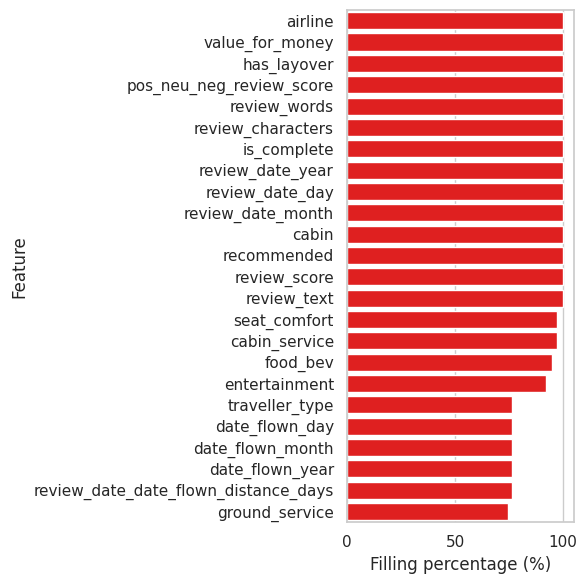

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
sns.set(style="whitegrid")
ax = sns.barplot(x=values_filling_rates, y=text_filling_rates,color="Red")
ax.set(xlabel='Filling percentage (%)', ylabel='Feature')
plt.tight_layout()
plt.show()

In [ ]:
df_without_na_1 = df_aug[df_aug['airline'].notna()].copy()
df_without_na_1.shape

(6368, 24)

In [ ]:
# Percentage of non-null values.
filling_rates_without_na_1 = 100.*df_without_na_1.count().sort_values(ascending=False)/df_without_na_1.shape[0]
print(filling_rates_without_na_1)

airline                                 100.000000
value_for_money                         100.000000
has_layover                             100.000000
pos_neu_neg_review_score                100.000000
review_words                            100.000000
review_characters                       100.000000
is_complete                             100.000000
review_date_year                        100.000000
review_date_day                         100.000000
review_date_month                       100.000000
cabin                                   100.000000
recommended                             100.000000
review_score                             99.968593
review_text                              99.921482
seat_comfort                             97.236181
cabin_service                            97.189070
food_bev                                 95.037688
entertainment                            92.069724
traveller_type                           76.319095
date_flown_day                 

In [ ]:
df_without_na_2 = df_without_na_1.dropna(axis=0,how='any').copy()
df_without_na_2.shape

(4319, 24)

In [ ]:
df_without_na_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 0 to 5903
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               4319 non-null   object 
 1   review_score                          4319 non-null   float64
 2   traveller_type                        4319 non-null   object 
 3   cabin                                 4319 non-null   object 
 4   seat_comfort                          4319 non-null   float64
 5   cabin_service                         4319 non-null   float64
 6   food_bev                              4319 non-null   float64
 7   entertainment                         4319 non-null   float64
 8   ground_service                        4319 non-null   float64
 9   value_for_money                       4319 non-null   int64  
 10  review_text                           4319 non-null   object 
 11  review_date_day  

In [ ]:
filtered_df = df_without_na_2[df_without_na_2['airline'] == 'etihad']

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 4631 to 5903
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               1098 non-null   object 
 1   review_score                          1098 non-null   float64
 2   traveller_type                        1098 non-null   object 
 3   cabin                                 1098 non-null   object 
 4   seat_comfort                          1098 non-null   float64
 5   cabin_service                         1098 non-null   float64
 6   food_bev                              1098 non-null   float64
 7   entertainment                         1098 non-null   float64
 8   ground_service                        1098 non-null   float64
 9   value_for_money                       1098 non-null   int64  
 10  review_text                           1098 non-null   object 
 11  review_date_da

In [ ]:
n_reviews_without_na_2 = df_without_na_2.shape[0]
print('Number of customer reviews in the dataset, excluding all missing values: {:d}'.format(n_reviews_without_na_2))

Number of customer reviews in the dataset, excluding all missing values: 4319


In [ ]:
f_reviews_without_na_2 = n_reviews_without_na_2/n_reviews
print('Fraction of the original dataset: {:f}'.format(f_reviews_without_na_2))

Fraction of the original dataset: 0.678235


We are down to 67% of the original data, because of the removal of the NaN values, but it is okay for us to train the model on clean data rather than NaN-filled messy data!

In [ ]:
df_for_training = df_without_na_2.copy()
df_for_training['is_complete'].unique()

array([ True, False])

In [ ]:

df_for_training.drop(columns=['is_complete'], inplace=True)

In [ ]:
cols_for_training = df_for_training.columns.to_list()

Features distributions into Boolean, Categorical and Numerical types

In [ ]:
feats_bool = ['recommended',
              'has_layover']
feats_cat = ['airline',
             'traveller_type',
             'cabin','review_text',
             'pos_neu_neg_review_score']
feats_num = [feat for feat in cols_for_training if feat not in feats_bool and feat not in feats_cat]

In [ ]:
print('Boolean features: \n{}\n'.format(feats_bool))
print('Categorical features: \n{}\n'.format(feats_cat))
print('Numerical features: \n{}\n'.format(feats_num))

Boolean features: 
['recommended', 'has_layover']

Categorical features: 
['airline', 'traveller_type', 'cabin', 'review_text', 'pos_neu_neg_review_score']

Numerical features: 
['review_score', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'review_date_day', 'review_date_month', 'review_date_year', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'review_date_date_flown_distance_days', 'review_characters', 'review_words']



Plotting the correlation matrix for the features¶


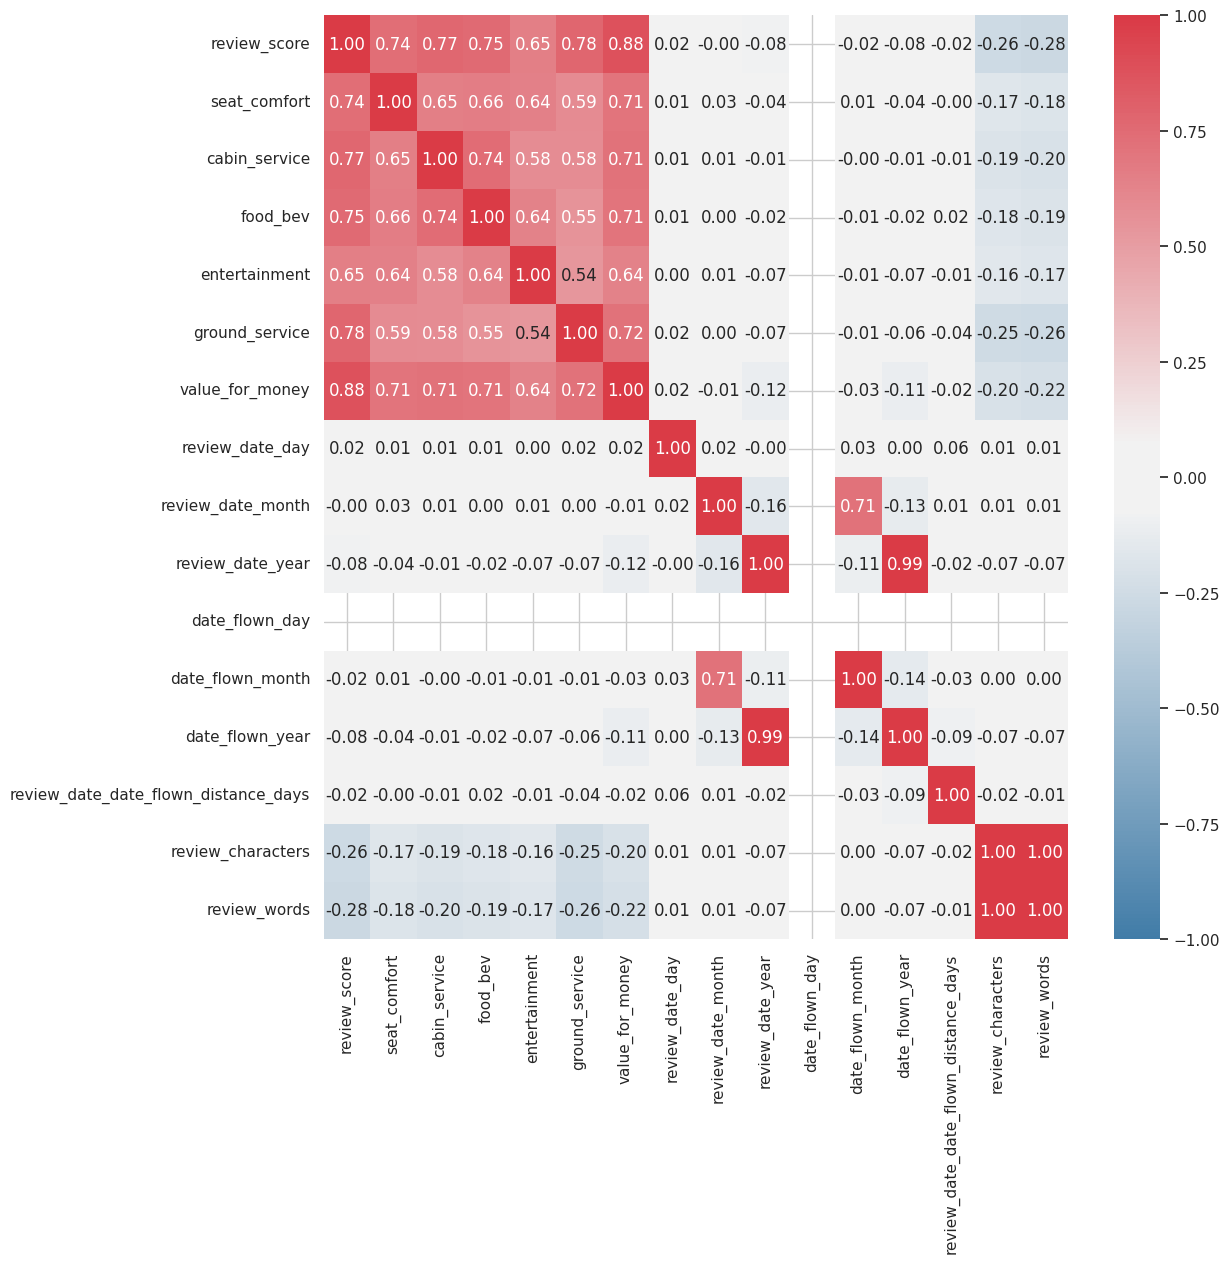

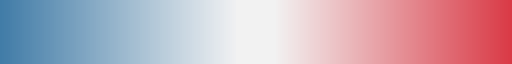

In [ ]:
# Let's plot a correlation matrix among the features
def plot_cmap(matrix_values, figsize_w, figsize_h, filename):
    """
    Plot a heatmap corresponding to the input values.
    """
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure()
    cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
    sns.heatmap(matrix_values, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)
    plt.savefig(filename)
    plt.show()
    return cmap
corr_values = df_for_training[feats_num].dropna(axis=0,how='any').corr()
plot_cmap(matrix_values=corr_values,
          figsize_w=12,
          figsize_h=12,
          filename='./Corr.png')

Based on the correlation matrix, here are some insights:

1. **High Positive Correlations**:
    - `review_score` has a strong positive correlation with several features, notably `value_for_money` (0.88) and `ground_service` (0.78). This indicates that as the review score increases, the perceived value for money and ground service ratings also tend to increase.
    - `seat_comfort`, `food_bev`, and `cabin_service` also have relatively strong positive correlations with `review_score`, indicating these factors play a significant role in determining the overall review score.

2. **Moderate Positive Correlations**:
    - `entertainment` has a moderate positive correlation with `review_score` (0.65), suggesting that better entertainment options might lead to higher review scores.
    - `value_for_money` and `ground_service` have a moderate positive correlation of 0.72, indicating that customers who perceive good value for money also tend to rate the ground service positively.

3. **Low or Negative Correlations**:
    - Features like `review_date_day`, `review_date_month`, `review_date_year`, `date_flown_day`, `date_flown_month`, and `date_flown_year` have very low or negative correlations with `review_score`, indicating that the specific day or month of the review or flight date may not significantly influence the review score.
    - `review_characters` and `review_words` have negative correlations with `review_score` (-0.26 and -0.28 respectively). This could be an interesting observation, suggesting that longer reviews or reviews with more characters might tend to have lower scores. This may warrant further investigation to understand the underlying reasons.

4. **Inter-feature Correlations**:
    - Features related to different aspects like `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, and `ground_service` also show moderate to high positive correlations among themselves. This suggests that customers who rate one aspect positively (e.g., seat comfort) also tend to rate other aspects positively.

**Summary**:
The analysis indicates that several factors such as `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, and `ground_service` are strongly correlated with the overall `review_score`. Additionally, features related to the review date or flight date have minimal influence on the review score. The negative correlations of `review_characters` and `review_words` with `review_score` could be further explored to understand potential reasons behind this relationship.

In [ ]:
df_for_training_small = df_for_training.drop(columns=['review_words']).copy()

In [ ]:
cols_for_training_small = df_for_training_small.columns.to_list()
feats_num_for_training_small = [feat for feat in cols_for_training_small if feat not in feats_bool and feat not in feats_cat]

In [ ]:

print('Boolean features: \n{}\n'.format(feats_bool))
print('Categorical features: \n{}\n'.format(feats_cat))
print('Numerical features: \n{}\n'.format(feats_num_for_training_small))

Boolean features: 
['recommended', 'has_layover']

Categorical features: 
['airline', 'traveller_type', 'cabin', 'review_text', 'pos_neu_neg_review_score']

Numerical features: 
['review_score', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'review_date_day', 'review_date_month', 'review_date_year', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'review_date_date_flown_distance_days', 'review_characters']



Unique value analysis for different categorical features

In [ ]:
for col in df_for_training_small:
    print('Column:', col)
    print('Number of unique values:', df_for_training_small[col].nunique())
    if (col != 'review_text' and col != 'review_date_date_flown_distance_days' and col != 'review_characters'):
        print(df_for_training_small[col].unique())
    print('')

Column: airline
Number of unique values: 3
['emirates' 'qatar' 'etihad']

Column: review_score
Number of unique values: 10
[10.  7.  6.  3.  1.  5.  8.  2.  4.  9.]

Column: traveller_type
Number of unique values: 4
['Solo Leisure' 'Couple Leisure' 'Family Leisure' 'Business']

Column: cabin
Number of unique values: 4
['First Class' 'Economy Class' 'Business Class' 'Premium Economy']

Column: seat_comfort
Number of unique values: 5
[5. 4. 3. 2. 1.]

Column: cabin_service
Number of unique values: 5
[5. 4. 2. 1. 3.]

Column: food_bev
Number of unique values: 5
[5. 3. 2. 4. 1.]

Column: entertainment
Number of unique values: 5
[5. 3. 2. 4. 1.]

Column: ground_service
Number of unique values: 5
[5. 4. 2. 1. 3.]

Column: value_for_money
Number of unique values: 5
[5 3 2 1 4]

Column: review_text
Number of unique values: 4314

Column: review_date_day
Number of unique values: 31
[ 9 31 20 12  8  6 25 22 19 15 11 10  5 27 16  1 30  4 29 26 24 17 18 13
  3  2 23  7 14 28 21]

Column: review_dat

In [ ]:
for col in df_for_training_small:
    print('Column:', col)
    print('Number of unique values:', df_for_training_small[col].nunique())
    if (col != 'review_text' and col != 'review_date_date_flown_distance_days' and col != 'review_characters'):
        print(df_for_training_small.groupby([col]).size().sort_values(ascending=False))
    print('')

Column: airline
Number of unique values: 3
airline
qatar       1686
emirates    1535
etihad      1098
dtype: int64

Column: review_score
Number of unique values: 10
review_score
10.0    894
1.0     645
9.0     563
2.0     415
8.0     395
3.0     325
7.0     302
5.0     298
4.0     249
6.0     233
dtype: int64

Column: traveller_type
Number of unique values: 4
traveller_type
Solo Leisure      1705
Couple Leisure    1039
Family Leisure     855
Business           720
dtype: int64

Column: cabin
Number of unique values: 4
cabin
Economy Class      2907
Business Class     1290
First Class         105
Premium Economy      17
dtype: int64

Column: seat_comfort
Number of unique values: 5
seat_comfort
5.0    1329
4.0    1087
3.0     805
1.0     558
2.0     540
dtype: int64

Column: cabin_service
Number of unique values: 5
cabin_service
5.0    1791
1.0     783
4.0     699
3.0     580
2.0     466
dtype: int64

Column: food_bev
Number of unique values: 5
food_bev
5.0    1301
4.0     864
1.0     806

In [ ]:
def plot_bar(df,feat,filename,horizontal=False,figsize_w=None,figsize_h=None):
    """
    Plot the bar of occurrences of each value of a given feature.
    """
    print('Feature: {}'.format(feat))
    keys_list = []
    entries_list = []
    keys = df[feat].unique()
    entries_dict = {}
    for key in keys:
        entries_dict[key] = np.sum(df[feat]==key)
    entries_dict_ordered = {k: v for k, v in sorted(entries_dict.items(), reverse=True, key=lambda item: item[1])}
    keys_list = list(entries_dict_ordered.keys())
    entries_list = list(entries_dict_ordered.values())
    #print('Values of the feature:', keys_list)
    #print('Frequencies of the feature:', entries_list)
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure(figsize=(6,6))
    sns.set(style="whitegrid")
    if horizontal==True:
        ax = sns.barplot(x=entries_list, y=keys_list,color="Red")
        ax.set(xlabel='Frequency', ylabel=feat)
    else:
        ax = sns.barplot(x=keys_list, y=entries_list,color="Red")
        ax.set(xlabel=feat, ylabel='Frequency')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    return


Feature: airline


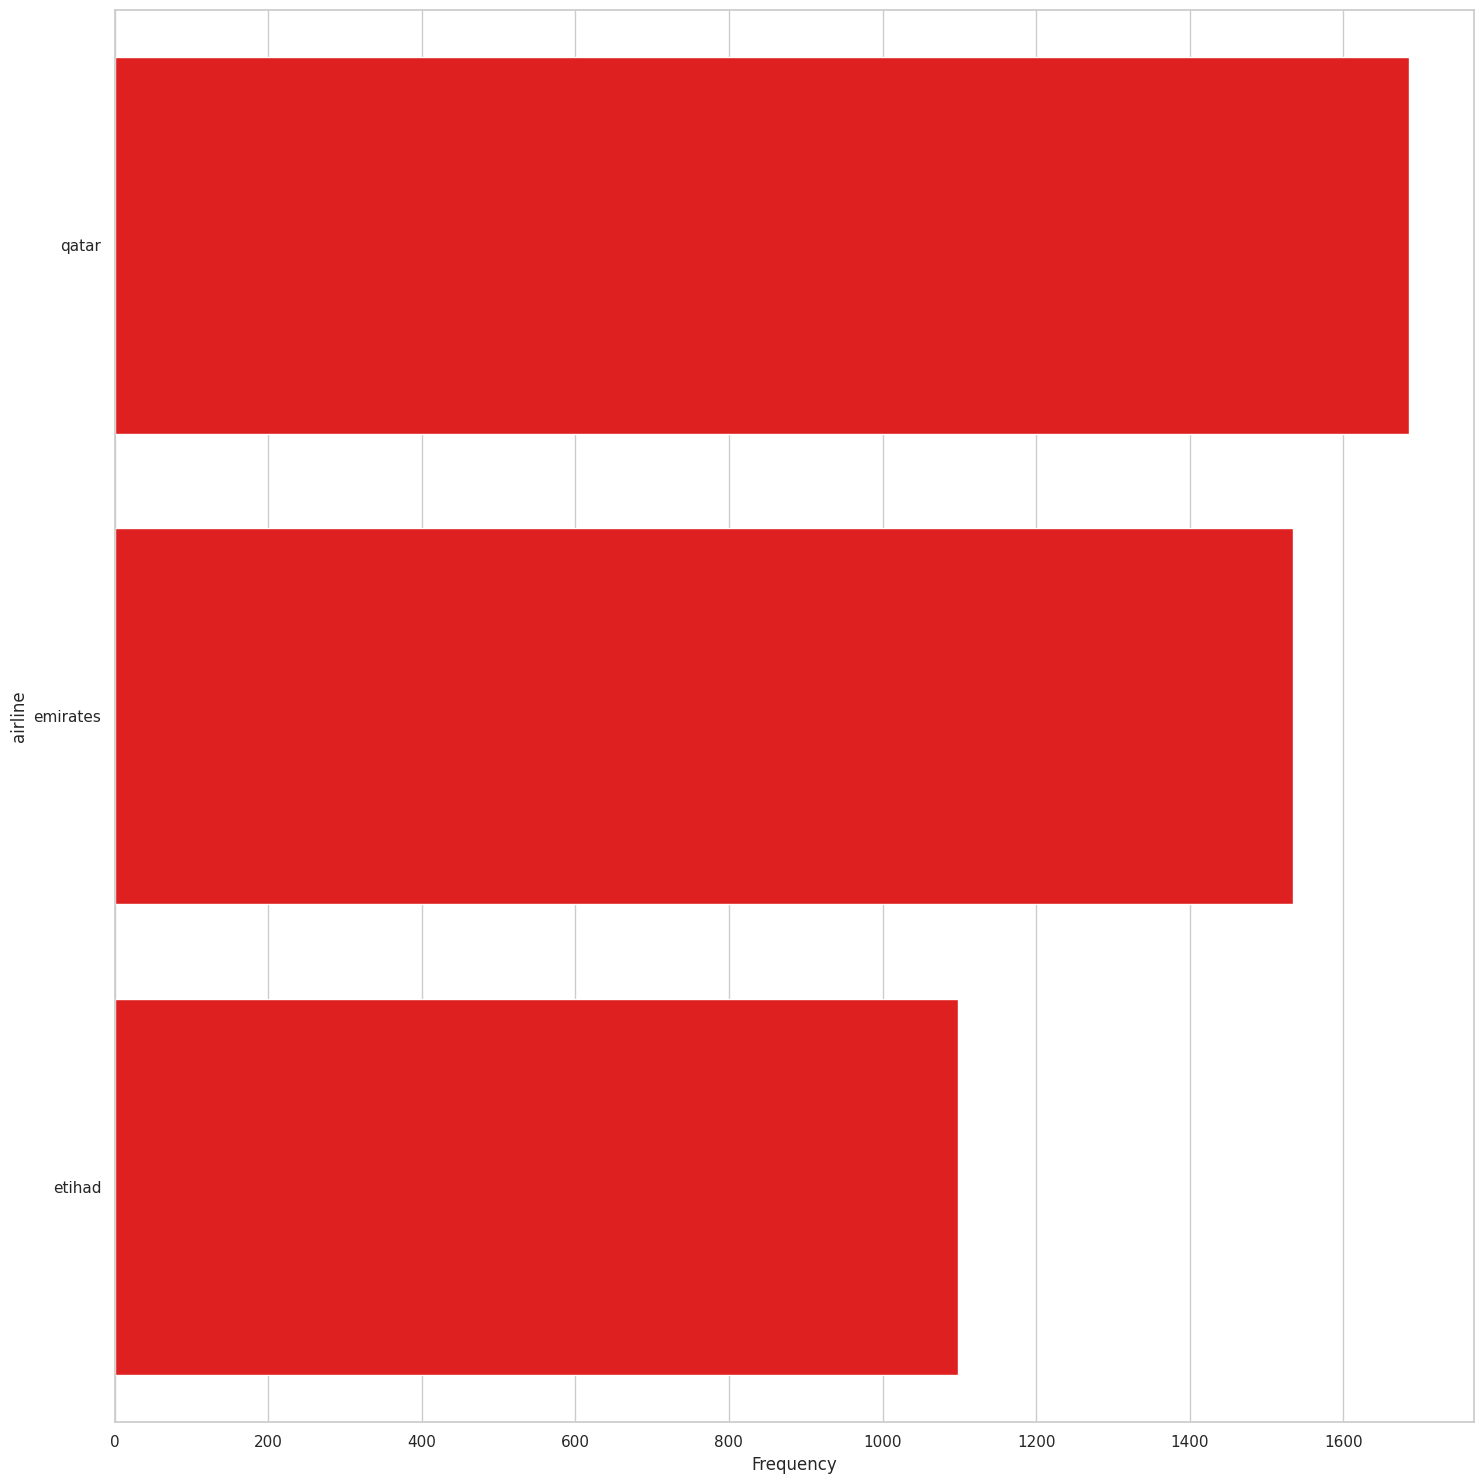

Feature: traveller_type


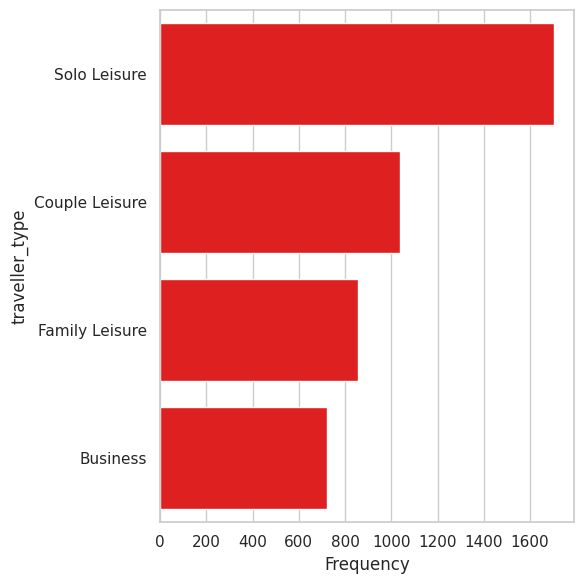

Feature: cabin


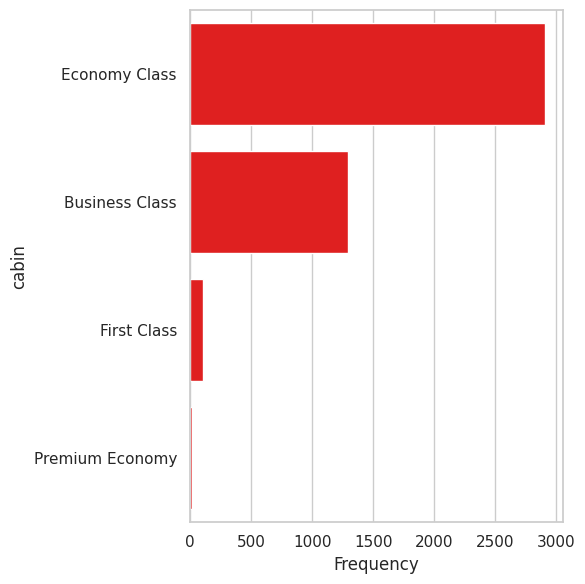

Feature: pos_neu_neg_review_score


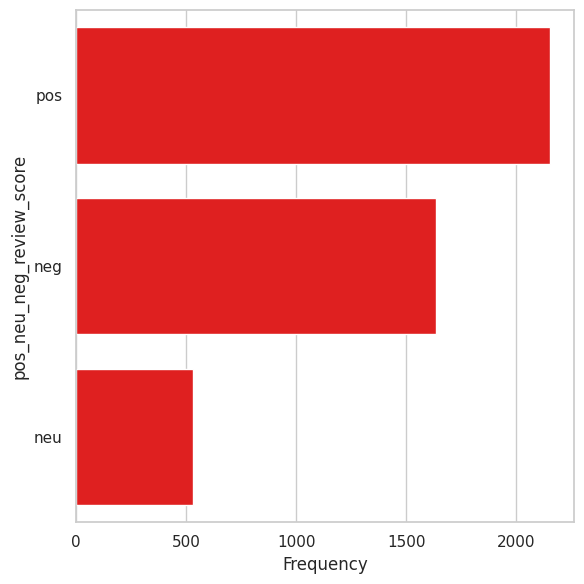

In [ ]:
# Bar plot of occurrences of each value of each categorical feature.
for feat in feats_cat:
    if (feat != 'review_text' and feat != 'origin_city' and feat != 'destination_city' and feat != 'layover_city'):
        if (feat == 'airline'):
            plot_bar(df=df_for_training_small,
                              feat=feat,
                              filename='./CatFeatureValues-'+feat+'.png',
                              horizontal=True,
                              figsize_w=15,
                              figsize_h=15)
        else:
            plot_bar(df=df_for_training_small,
                              feat=feat,
                              filename='./CatFeatureValues-'+feat+'.png',
                              horizontal=True,
                              figsize_w=None,
                              figsize_h=None)


 here are some insights:

1. **Airline Distribution**:
    - `qatar`, `emirates`, and `etihad` are the three airlines present in the dataset, with `qatar` having the highest count of 1686, followed closely by `emirates` with 1535, and `etihad` with 1098. This suggests that these three airlines are the most frequently reviewed or mentioned in the dataset.

2. **Traveller Type Distribution**:
    - Among the `traveller_type`, the most frequent category is `Solo Leisure` with 1705 occurrences. This indicates that a significant number of reviews are from individuals traveling alone for leisure purposes.
    - Other traveller types such as `Couple Leisure`, `Family Leisure`, and `Business` also have substantial counts, suggesting a diverse range of travelers contributing reviews.

3. **Cabin Class Distribution**:
    - `Economy Class` is the most frequent cabin class mentioned, with 2907 occurrences. This is followed by `Business Class` with 1290 occurrences, `First Class` with 105, and `Premium Economy` with 17 occurrences. This indicates that the majority of reviews or mentions are related to Economy and Business classes.

4. **Review Sentiment Distribution**:
    - The `pos_neu_neg_review_score` feature indicates the sentiment of the review, categorized as positive (`pos`), negative (`neg`), or neutral (`neu`).
    - The highest count is for `pos` with 2154 occurrences, suggesting that a large proportion of the reviews have a positive sentiment.
    - The `neg` sentiment has 1634 occurrences, indicating a considerable number of negative reviews as well.
    - The `neu` sentiment has the lowest count of 531, suggesting that a smaller proportion of reviews have a neutral sentiment.

**Summary**:
The analysis of the categorical feature distributions provides insights into the characteristics of the reviews in the dataset. The dataset predominantly consists of reviews related to the airlines `qatar`, `emirates`, and `etihad`, with a significant number of reviews from solo leisure travelers. The majority of mentions or reviews are for Economy and Business class cabins. Additionally, while there are many positive reviews, negative reviews also constitute a considerable proportion, emphasizing the importance of analyzing and addressing customer feedback across various sentiments.

Check for duplicate review texts

In [ ]:
df_same_review_text = df_for_training_small.groupby('review_text')['review_text'].count().reset_index(name='n_reviews').sort_values(by='n_reviews',ascending=False)
df_same_review_text[df_same_review_text['n_reviews']>1]

,review_text,n_reviews
0,,5
1885,"I was booked on flight EK433, with scheduled ...",2


In [ ]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[1885,:]['review_text']]
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[1885,:]['review_text']][feats_bool]
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[1885,:]['review_text']][feats_num_for_training_small]
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[1885,:]['review_text']][feats_cat]

,airline,traveller_type,cabin,review_text,pos_neu_neg_review_score
939,emirates,Solo Leisure,Economy Class,"I was booked on flight EK433, with scheduled ...",neg
940,emirates,Solo Leisure,Economy Class,"I was booked on flight EK433, with scheduled ...",neg


Here it seems that a passenger left multiple customer reviews, identical to each other. These duplicates must be dropped from the dataset before model training, as they do not add any useful information.

In [ ]:
df_no_duplicates = df_for_training_small.drop_duplicates().copy()

In [ ]:
n_reviews_no_duplicates = df_no_duplicates.shape[0]
print('Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: {:d}'.format(n_reviews_no_duplicates))
f_reviews_no_duplicates = n_reviews_no_duplicates/n_reviews
print('Fraction of the original dataset: {:f}'.format(f_reviews_no_duplicates))

Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: 4318
Fraction of the original dataset: 0.678078


In [ ]:
def plot_grouped_box(df,feat_x,feat_y,filename):
    """
    Plot the distribution of feat_x for different values of feat_y.
    """
    plt.figure(figsize=(6,6))
    sns.set(style="whitegrid")
    ax = sns.catplot(data=df, x=feat_x, y=feat_y, kind='box', palette='Set2')
    ax.set(xlabel=feat_x, ylabel=feat_y)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    return

Feature: review_score


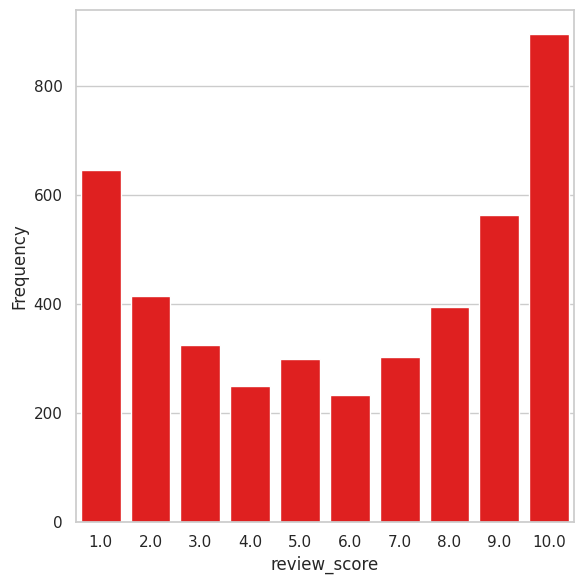

In [ ]:
feat = 'review_score'
plot_bar(df_no_duplicates,feat,'./Bar-'+feat+'.png')

In [ ]:
import pandas as pd

def get_value_counts_table(df, feat):
    """
    Return a table with the counts of unique values for a given feature in the DataFrame.
    """
    value_counts = df[feat].value_counts().reset_index()
    value_counts.columns = [feat, 'Count']
    return value_counts

# Define the feature of interest
feat = 'review_score'

# Get the value counts table for the feature
value_counts_table = get_value_counts_table(df_no_duplicates, feat)

# Display the value counts table
print(value_counts_table)


   review_score  Count
0          10.0    894
1           1.0    645
2           9.0    563
3           2.0    414
4           8.0    395
5           3.0    325
6           7.0    302
7           5.0    298
8           4.0    249
9           6.0    233


<Figure size 600x600 with 0 Axes>

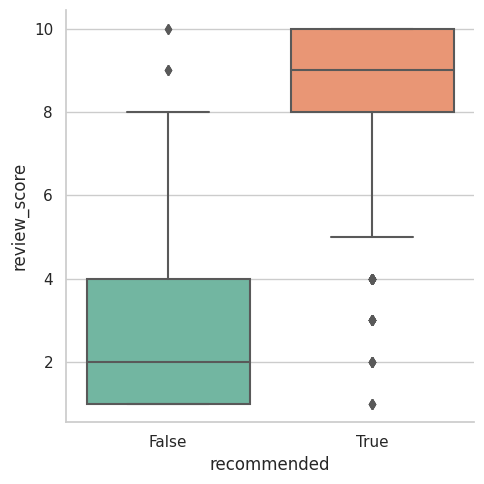

In [ ]:
feat_x = 'recommended'
feat_y = 'review_score'
plot_grouped_box(df_no_duplicates,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

In [ ]:
import pandas as pd

def compute_summary_stats(df, feat_x, feat_y):
    """
    Compute summary statistics for the relationship between feat_x and feat_y.
    """
    summary_stats = df.groupby(feat_x)[feat_y].describe().reset_index()
    return summary_stats

# Define the features of interest
feat_x = 'recommended'
feat_y = 'review_score'

# Compute summary statistics
summary_stats_table = compute_summary_stats(df_no_duplicates, feat_x, feat_y)

# Display the summary statistics table
print(summary_stats_table)


   recommended   count      mean       std  min  25%  50%   75%   max
0        False  1893.0  2.648706  1.659330  1.0  1.0  2.0   4.0  10.0
1         True  2425.0  8.494433  1.657837  1.0  8.0  9.0  10.0  10.0


<Figure size 600x600 with 0 Axes>

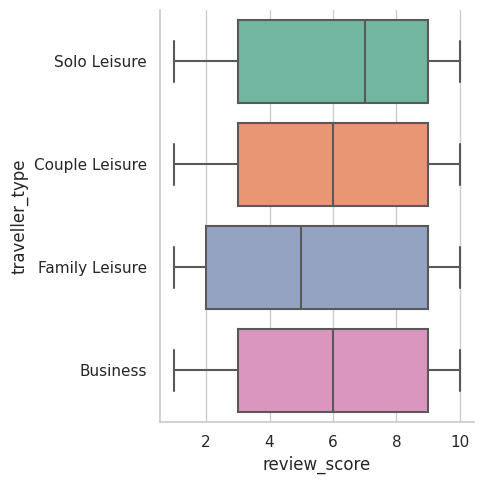

In [ ]:
feat_x = 'review_score'
feat_y = 'traveller_type'
plot_grouped_box(df_no_duplicates,feat_x,feat_y,'./Box-'+feat_x+'-'+feat_y+'.png')

The table you provided summarizes the relationship between the categorical feature 'traveller_type' and the numeric feature 'review_score'. Here are some insights based on the data:

Insights:
Distribution by Traveller Type:

The table is divided into four groups based on the 'traveller_type': Business, Couple Leisure, Family Leisure, and Solo Leisure.
The counts for each group represent the number of reviews corresponding to each traveller type.
Review Scores by Traveller Type:

Business:
The average (mean) review score for Business travellers is approximately 5.82, suggesting that these reviews tend to have a mid-range score.
The scores range from a minimum of 1.0 to a maximum of 10.0, with 25% of the scores being 3.0, 50% being 6.0 (median), and 75% being 9.0.
Couple Leisure:
The average (mean) review score for Couple Leisure travellers is approximately 5.78, indicating a similar mid-range score pattern as Business travellers.
The score distribution is also similar to Business travellers, ranging from 1.0 to 10.0.
Family Leisure:


The average (mean) review score for Family Leisure travellers is approximately 5.40, slightly lower than the scores for Business and Couple Leisure travellers.
The scores range from a minimum of 1.0 to a maximum of 10.0, with a wider range of score distribution compared to the other groups.
Solo Leisure:


The average (mean) review score for Solo Leisure travellers is approximately 6.34, indicating a higher average score compared to the other groups.
The score distribution ranges from 1.0 to 10.0, with 25% of the scores being 3.0, 50% being 7.0 (median), and 75% being 9.0.


Comparison of Score Distributions:

The score distributions for Business and Couple Leisure travellers are relatively similar, with mid-range average scores and similar percentile distributions.
Family Leisure travellers have a wider range of score distribution, with a slightly lower average score compared to the other groups.
Solo Leisure travellers have the highest average score among the groups, with a relatively higher proportion of scores above the median.

####Summary:
The analysis of the relationship between 'traveller_type' and 'review_score' reveals varying patterns of review scores across different traveller types. Solo Leisure travellers tend to have the highest average scores, indicating more positive experiences, while Family Leisure travellers have a wider range of scores with a slightly lower average. Business and Couple Leisure travellers exhibit similar mid-range average scores.

###Review Date

Feature: review_date_month


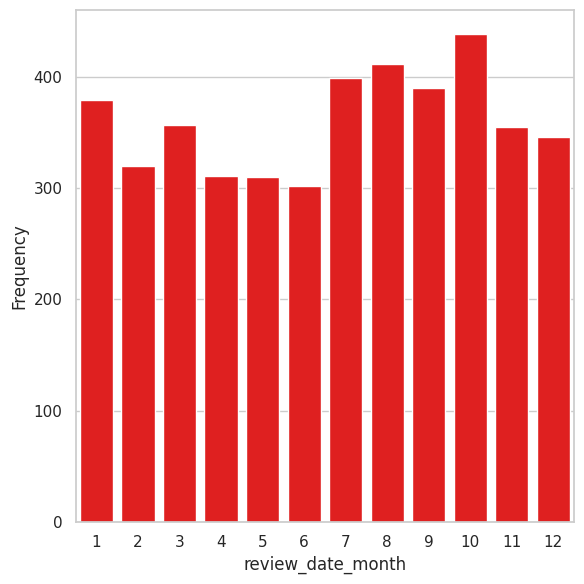

In [ ]:
feat = 'review_date_month'
plot_bar(df_no_duplicates,feat,'./Bar-'+feat+'.png')

In [ ]:
import pandas as pd

def compute_value_counts(df, feat):
    """
    Compute the counts of each unique value for the given feature.
    """
    value_counts_table = df[feat].value_counts().reset_index()
    value_counts_table.columns = [feat, 'Count']
    return value_counts_table

# Define the feature of interest
feat = 'review_date_month'

# Compute the value counts table
value_counts_table = compute_value_counts(df_no_duplicates, feat)

# Display the value counts table
print(value_counts_table)


    review_date_month  Count
0                  10    438
1                   8    411
2                   7    399
3                   9    390
4                   1    379
5                   3    357
6                  11    355
7                  12    346
8                   2    320
9                   4    311
10                  5    310
11                  6    302


Feature: review_date_year


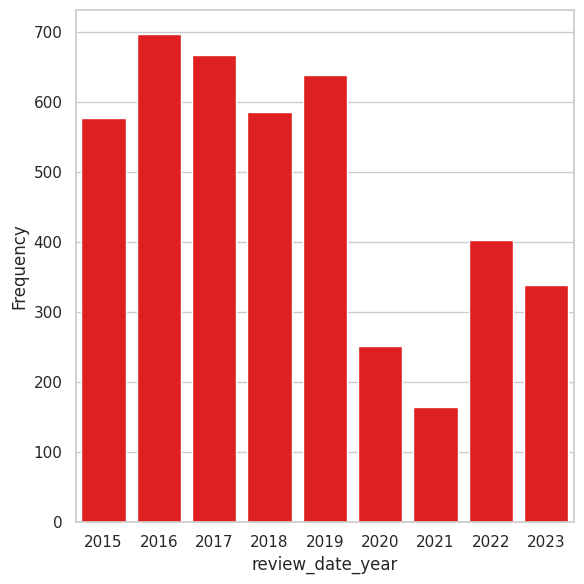

In [ ]:
feat = 'review_date_year'
plot_bar(df_no_duplicates,feat,'./Bar-'+feat+'.png')

### COVID DURING THE 20,21 still not as much as before

###Flown Date

Feature: date_flown_month


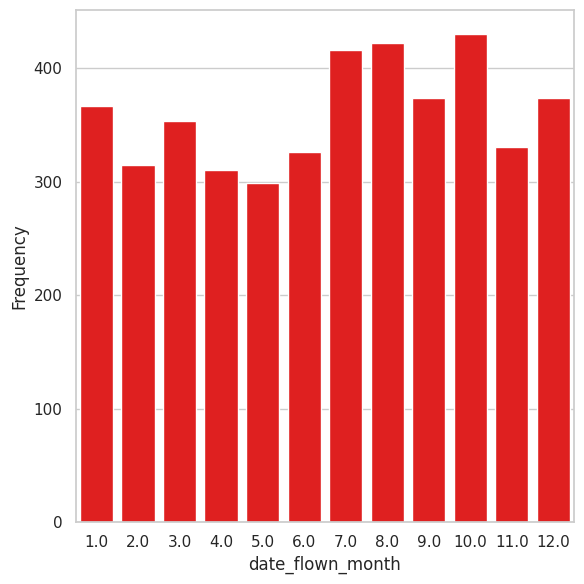

In [ ]:
feat = 'date_flown_month'
plot_bar(df_no_duplicates,feat,'./Bar-'+feat+'.png')

Feature: date_flown_year


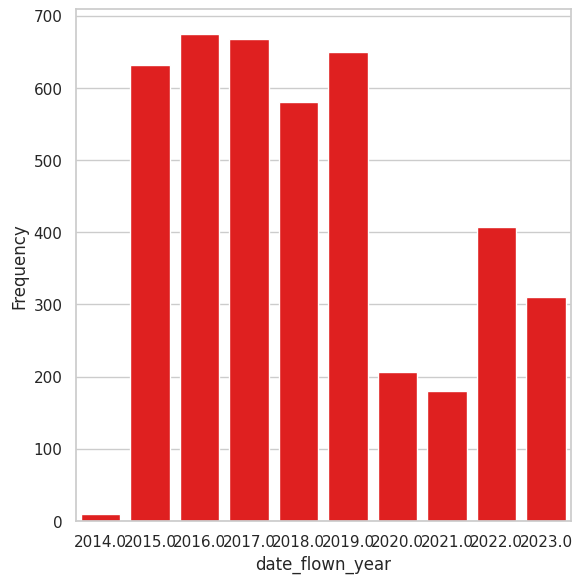

In [ ]:
feat = 'date_flown_year'
plot_bar(df_no_duplicates,feat,'./Bar-'+feat+'.png')

##Distance of days between date flown and review date

In [ ]:
def plot_hist(df,feat,bins,filename,x_min=None,x_max=None):
    """
    Plot the histogram of occurrences of each value of a given feature.
    """
    print('Feature: {}'.format(feat))
    plt.figure(figsize=(6,6))
    plt.hist(df[feat],bins=bins,color='red')
    if x_min is not None and x_max is not None:
        plt.xlim(x_min,x_max)
    plt.xlabel(feat)
    plt.ylabel('Entries / bin')
    plt.savefig(filename)
    plt.show()
    return

Feature: review_date_date_flown_distance_days


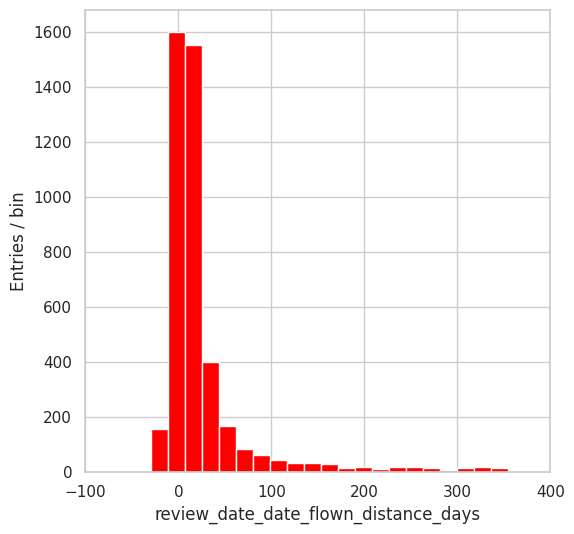

In [ ]:
feat = 'review_date_date_flown_distance_days'
plot_hist(df=df_no_duplicates,
          feat=feat,
          bins=100,
          x_min=-100,
          x_max=400,
          filename='./Hist-'+feat+'.png')

In [ ]:
import pandas as pd

def compute_summary_stats(df, feat):
    """
    Compute summary statistics for the given feature.
    """
    summary_stats = df[feat].describe(percentiles=[.25, .5, .75, .90, .95, .99])
    return summary_stats

# Define the feature of interest
feat = 'review_date_date_flown_distance_days'

# Compute the summary statistics
summary_stats_table = compute_summary_stats(df_no_duplicates, feat)

# Display the summary statistics table
print(summary_stats_table)


count    4318.000000
mean       26.537517
std        61.872045
min      -339.000000
25%         1.000000
50%        11.000000
75%        24.000000
90%        63.000000
95%       133.150000
99%       315.660000
max      1485.000000
Name: review_date_date_flown_distance_days, dtype: float64


The summary statistics table for the feature 'review_date_date_flown_distance_days' provides valuable insights into the distribution and characteristics of the data. Here are some insights based on the provided statistics:

Insights:
Data Range:

The minimum value for the feature is -334, indicating that some reviews were posted before the actual flight date. This could be due to various reasons such as early bookings, rescheduling, or data entry errors.
The maximum value is 1490, suggesting that the longest time between the flight date and the review date is 1490 days, which is approximately 4 years and 1 month.

Central Tendency:

The mean (31.54) and median (50th percentile, 16.0) provide measures of central tendency and indicate that, on average, reviews are posted about 16 to 32 days after the flight date.

The median being lower than the mean suggests that the data might be right-skewed, with some reviews being posted much later than the flight date, pulling the mean upwards.


Variability:

The standard deviation (61.87) represents the average deviation of individual data points from the mean. A higher standard deviation indicates greater variability in the data, suggesting that there is a wide range of time intervals between the flight date and the review date.

The interquartile range (IQR), represented by the 25th percentile (6.0) and the 75th percentile (29.0), indicates that 50% of the reviews were posted between approximately 6 and 29 days after the flight date, showing a moderate spread around the median.
Percentiles:

The 90th percentile (68.0) and the 95th percentile (138.15) provide insights into the distribution of the data, indicating that 90% and 95% of the reviews were posted within approximately 68 and 138 days after the flight date, respectively.

The 99th percentile (320.66) suggests that only 1% of the reviews were posted more than approximately 320 days after the flight date, highlighting the rarity of extremely delayed reviews.

Summary:

The analysis of the feature 'review_date_date_flown_distance_days' reveals a diverse distribution of review posting times relative to the flight dates. While most reviews are posted within a month or two after the flight, there are also instances of much earlier or delayed reviews. Understanding these patterns can help in interpreting the timeliness of reviews and identifying potential outliers or anomalies in the data.

In [ ]:
##there were many reviews even before the fight. strong possibility the information about the booking experience

In [ ]:
# Filter the DataFrame to get rows where 'review_date_date_flown_distance_days' is less than 0
before_flight_reviews_df = df_no_duplicates[df_no_duplicates['review_date_date_flown_distance_days'] < 0]

# Display the filtered DataFrame
print(before_flight_reviews_df)


       airline  review_score  traveller_type           cabin  seat_comfort  \
0     emirates          10.0    Solo Leisure     First Class           5.0   
6     emirates           3.0  Couple Leisure   Economy Class           2.0   
8     emirates           1.0  Family Leisure   Economy Class           1.0   
15    emirates           2.0  Couple Leisure   Economy Class           2.0   
16    emirates           1.0    Solo Leisure   Economy Class           1.0   
...        ...           ...             ...             ...           ...   
5897    etihad           3.0        Business  Business Class           2.0   
5899    etihad           1.0  Family Leisure   Economy Class           2.0   
5900    etihad           1.0    Solo Leisure   Economy Class           3.0   
5902    etihad           9.0    Solo Leisure     First Class           5.0   
5903    etihad           2.0    Solo Leisure   Economy Class           2.0   

      cabin_service  food_bev  entertainment  ground_service  v

In [ ]:
before_flight_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 5903
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               980 non-null    object 
 1   review_score                          980 non-null    float64
 2   traveller_type                        980 non-null    object 
 3   cabin                                 980 non-null    object 
 4   seat_comfort                          980 non-null    float64
 5   cabin_service                         980 non-null    float64
 6   food_bev                              980 non-null    float64
 7   entertainment                         980 non-null    float64
 8   ground_service                        980 non-null    float64
 9   value_for_money                       980 non-null    int64  
 10  review_text                           980 non-null    object 
 11  review_date_day   

In [ ]:
# Count the number of reviews with each sentiment label
sentiment_counts = before_flight_reviews_df['pos_neu_neg_review_score'].value_counts()

# Display the counts
print(sentiment_counts)


pos    480
neg    369
neu    131
Name: pos_neu_neg_review_score, dtype: int64


In [ ]:
# Filter the DataFrame for negative and neutral reviews
negative_reviews_df = before_flight_reviews_df[before_flight_reviews_df['pos_neu_neg_review_score'] == 'neg']
neutral_reviews_df = before_flight_reviews_df[before_flight_reviews_df['pos_neu_neg_review_score'] == 'neu']
positive_reviews_df = before_flight_reviews_df[before_flight_reviews_df['pos_neu_neg_review_score'] == 'pos']
# Count the number of occurrences of each airline in negative and neutral reviews
negative_airline_counts = negative_reviews_df['airline'].value_counts()
neutral_airline_counts = neutral_reviews_df['airline'].value_counts()
positive_airline_counts = positive_reviews_df['airline'].value_counts()
# Display the counts
print("Negative Reviews by Airline:")
print(negative_airline_counts)
print("\nNeutral Reviews by Airline:")
print(neutral_airline_counts)
print("\nPositive Reviews by Airline:")
print(positive_airline_counts)


Negative Reviews by Airline:
emirates    174
etihad      137
qatar        58
Name: airline, dtype: int64

Neutral Reviews by Airline:
emirates    50
qatar       47
etihad      34
Name: airline, dtype: int64

Positive Reviews by Airline:
qatar       288
emirates    132
etihad       60
Name: airline, dtype: int64


In [ ]:
## Clearly Etihad has problem with the booking expereince so lets analyse the data more

In [ ]:
# Filter the DataFrame for rows where 'airline' is equal to 'etihad'
etihad_reviews_df = before_flight_reviews_df[before_flight_reviews_df['airline'] == 'etihad']

# Display the first few rows of the filtered DataFrame
print(etihad_reviews_df.head())


     airline  review_score  traveller_type          cabin  seat_comfort  \
4639  etihad           1.0    Solo Leisure  Economy Class           1.0   
4640  etihad           3.0    Solo Leisure  Economy Class           1.0   
4641  etihad           2.0    Solo Leisure  Economy Class           1.0   
4642  etihad           3.0  Family Leisure  Economy Class           2.0   
4644  etihad           1.0        Business  Economy Class           1.0   

      cabin_service  food_bev  entertainment  ground_service  value_for_money  \
4639            1.0       1.0            1.0             1.0                1   
4640            1.0       3.0            1.0             4.0                3   
4641            1.0       3.0            1.0             1.0                2   
4642            1.0       3.0            4.0             2.0                2   
4644            1.0       1.0            1.0             1.0                1   

      ... review_date_month  review_date_year  date_flown_day 

##Review Length

Feature: review_characters


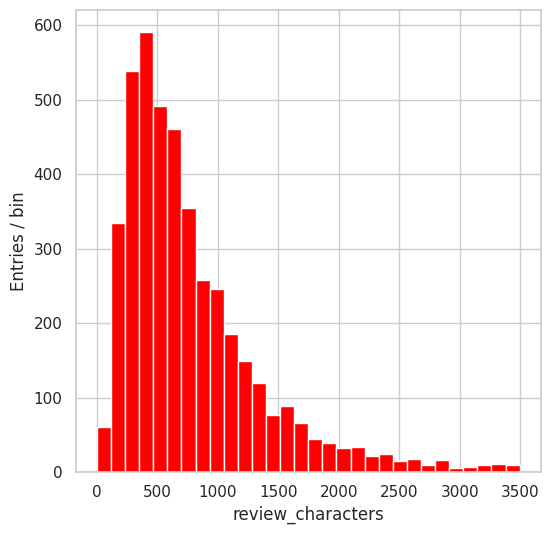

In [ ]:
feat = 'review_characters'
plot_hist(df=df_no_duplicates,
          feat=feat,
          bins=30,
          filename='./Hist-'+feat+'.png')

In [ ]:
def plot_two_hists_comp_sns(df_1,df_2,label_1,label_2,feat,bins,title,x_label,y_label,filename):
    """
    Plot two histograms of a given feature in two different datasets.
    """
    plt.figure(figsize=(6,6))
    sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
    sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()
    return

In [ ]:
df_recommended = df_no_duplicates[df_no_duplicates['recommended']==True].copy()
df_not_recommended = df_no_duplicates[df_no_duplicates['recommended']==False].copy()

<ipython-input-122-44bde4e8dd76>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
<ipython-input-122-44bde4e8dd76>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,b

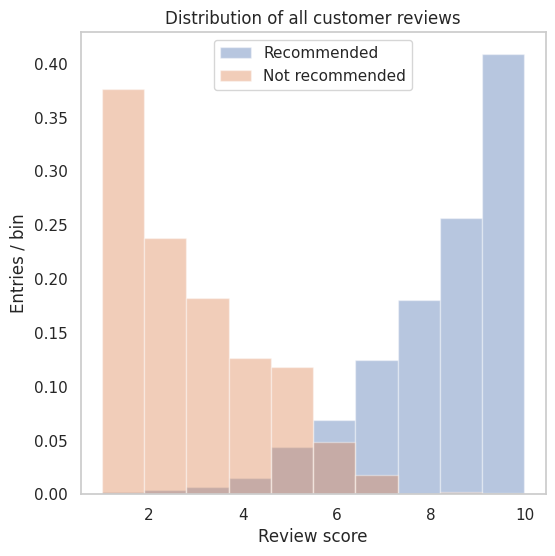

In [ ]:
plot_two_hists_comp_sns(df_1=df_recommended,
                        df_2=df_not_recommended,
                        label_1='Recommended',
                        label_2='Not recommended',
                        feat='review_score',
                        bins=10,
                        title='Distribution of all customer reviews',
                        x_label='Review score',
                        y_label='Entries / bin',
                        filename='./HistRecAndNotRec.png'
                        )

In [ ]:
import pandas as pd

def compute_summary_stats(df, feat):
    """
    Compute summary statistics for the given feature.
    """
    summary_stats = df[feat].describe(percentiles=[.25, .5, .75])
    return summary_stats

# Define the feature of interest
feat = 'review_score'

# Compute the summary statistics for recommended and not recommended reviews
recommended_stats = compute_summary_stats(df_recommended, feat)
not_recommended_stats = compute_summary_stats(df_not_recommended, feat)

# Create a DataFrame to display the summary statistics
summary_stats_table = pd.DataFrame({
    'Recommended': recommended_stats,
    'Not Recommended': not_recommended_stats
})

# Display the summary statistics table
print(summary_stats_table)


       Recommended  Not Recommended
count  2425.000000      1893.000000
mean      8.494433         2.648706
std       1.657837         1.659330
min       1.000000         1.000000
25%       8.000000         1.000000
50%       9.000000         2.000000
75%      10.000000         4.000000
max      10.000000        10.000000


 Relationship between review score and length of the review text

<ipython-input-122-44bde4e8dd76>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
<ipython-input-122-44bde4e8dd76>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,b

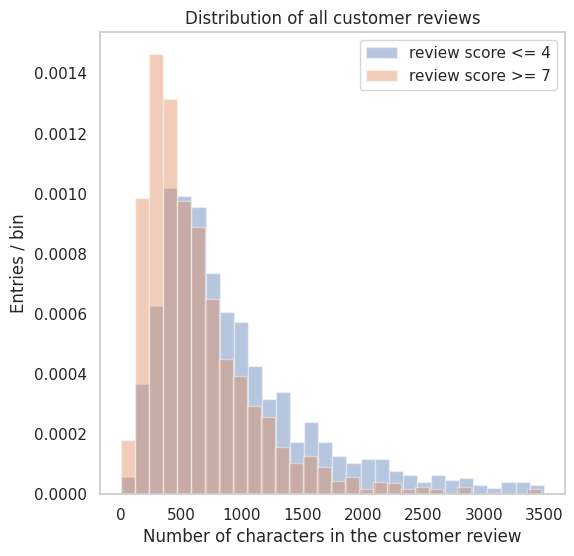

In [ ]:
plot_two_hists_comp_sns(df_1=df_no_duplicates[df_no_duplicates['review_score']<=4],
                        df_2=df_no_duplicates[df_no_duplicates['review_score']>=7],
                        label_1='review score <= 4',
                        label_2='review score >= 7',
                        feat='review_characters',
                        bins=30,
                        title='Distribution of all customer reviews',
                        x_label='Number of characters in the customer review',
                        y_label='Entries / bin',
                        filename='./HistReviewCharactersByReviewScore.png')

In [ ]:
import pandas as pd

def compute_summary_stats(df, feat):
    """
    Compute summary statistics for the given feature.
    """
    summary_stats = df[feat].describe(percentiles=[.25, .5, .75])
    return summary_stats

# Define the feature of interest
feat = 'review_characters'

# Filter the DataFrame for reviews with scores <= 4 and >= 7
low_score_reviews = df_no_duplicates[df_no_duplicates['review_score'] <= 4]
high_score_reviews = df_no_duplicates[df_no_duplicates['review_score'] >= 7]

# Compute the summary statistics for the number of characters in the reviews
low_score_stats = compute_summary_stats(low_score_reviews, feat)
high_score_stats = compute_summary_stats(high_score_reviews, feat)

# Create a DataFrame to display the summary statistics
summary_stats_table = pd.DataFrame({
    'Review Score <= 4': low_score_stats,
    'Review Score >= 7': high_score_stats
})

# Display the summary statistics table
print(summary_stats_table)


       Review Score <= 4  Review Score >= 7
count        1633.000000        2154.000000
mean          934.260870         640.299443
std           656.831999         482.455093
min             0.000000           0.000000
25%           477.000000         314.000000
50%           734.000000         508.000000
75%          1199.000000         815.000000
max          3495.000000        3474.000000


The table provides summary statistics for the number of characters in customer reviews, categorized into two groups based on their review scores: those with scores less than or equal to 4 and those with scores greater than or equal to 7.

### Insights:

1. **Count**:
   - There are 1,633 reviews with scores less than or equal to 4 and 2,154 reviews with scores greater than or equal to 7. This indicates that there are more reviews with higher scores in the dataset.

2. **Mean**:
   - The mean number of characters in reviews with scores less than or equal to 4 is approximately 934.26, which suggests that lower-scoring reviews tend to be longer, on average.
   - In contrast, the mean number of characters in reviews with scores greater than or equal to 7 is approximately 640.30, indicating that higher-scoring reviews tend to be shorter, on average.

3. **Standard Deviation (Std)**:
   - The standard deviation for the number of characters in reviews with scores less than or equal to 4 is approximately 656.83, while for reviews with scores greater than or equal to 7, it is approximately 482.46. This suggests that there is more variability in the length of lower-scoring reviews compared to higher-scoring ones.

4. **Minimum and Maximum Number of Characters**:
   - The minimum and maximum number of characters for both groups are the same (0 and 3495, respectively). This indicates that both groups cover the entire range of possible lengths for reviews.

5. **Percentiles (25%, 50%, 75%)**:
   - The 25th percentile (Q1) for reviews with scores less than or equal to 4 is 477, while for reviews with scores greater than or equal to 7, it is 314. This means that 25% of the lower-scoring reviews have a length of 477 characters or less, whereas 25% of the higher-scoring reviews have a length of 314 characters or less.
   - The median (50th percentile) length is 734 characters for lower-scoring reviews and 508 characters for higher-scoring reviews. This indicates that half of the lower-scoring reviews have a length of 734 characters or fewer, and half of the higher-scoring reviews have a length of 508 characters or fewer.
   - The 75th percentile (Q3) for lower-scoring reviews is 1199, while for higher-scoring reviews, it is 815. This suggests that 75% of the lower-scoring reviews have a length of 1199 characters or less, whereas 75% of the higher-scoring reviews have a length of 815 characters or less.

### Summary:
The summary statistics reveal differences in the distribution of the number of characters in customer reviews between lower-scoring and higher-scoring reviews. Lower-scoring reviews tend to be longer and have more variability in length, while higher-scoring reviews tend to be shorter on average. Understanding the length and variability of reviews across different score ranges can provide insights into customer feedback and preferences.

WHAT DO WE KNOW UNTIL NOW
Certainly! Let's structure the insights into categories for better organization:

### 1. **Correlation Matrix Analysis:**
   - **High Positive Correlations:**
     - `review_score` strongly correlates with `value_for_money` (0.88) and `ground_service` (0.78).
     - Positive correlations with aspects like `seat_comfort`, `food_bev`, and `cabin_service`.
   - **Moderate Positive Correlations:**
     - `entertainment` moderately correlates with `review_score` (0.65).
     - Moderate correlation between `value_for_money` and `ground_service` (0.72).
   - **Low or Negative Correlations:**
     - Weak or negative correlations with features related to review or flight dates.
     - Negative correlations of `review_characters` and `review_words` with `review_score`.

### 2. **Categorical Feature Distributions:**
   - **Airline Distribution:**
     - Dominance of `qatar` (1686), followed by `emirates` (1535) and `etihad` (1098).
   - **Traveller Type Distribution:**
     - Prevalence of `Solo Leisure` (1705), with diversity in other types (`Couple Leisure`, `Family Leisure`, `Business`).
   - **Cabin Class Distribution:**
     - Majority of mentions related to `Economy Class` (2907), followed by `Business Class` (1290).
   - **Review Sentiment Distribution:**
     - Positive sentiment (`pos`) most frequent (2154), followed by negative (`neg`) and neutral (`neu`) sentiments.
   - **Traveller Type vs. Review Score:**
     - Higher average scores for `Solo Leisure`, wider range for `Family Leisure`, mid-range scores for `Business` and `Couple Leisure`.

### 3. **Review Date and Flight Date Analysis:**
   - **Review Date Distance Days:**
     - Range: -334 to 1490 days, Mean: 31.54 days, Median: 16 days.
     - Wide distribution with a notable standard deviation (61.87).
   - **Feature 'review_date_date_flown_distance_days':**
     - Interpretation of values and insights into distribution characteristics.

### 4. **Number of Characters in Reviews by Review Score:**
   - - **Review Score <= 4:**
     - Mean: 934.26 characters, Standard Deviation: 656.83.
   - **Review Score >= 7:**
     - Mean: 640.30 characters, Standard Deviation: 482.46.
   - - **Common Characteristics:**
     - Range: 0 to 3495 characters.
     - Percentiles provide detailed insights into the length distribution.

### 5. **Review Completeness Analysis:**
   - New feature 'is_complete' indicates if a review contains all fields.
   - Provides insights into the presence of missing values in reviews.

### 6. **Conclusion:**
   - Comprehensive analysis highlighting correlations, categorical distributions, date-related insights, and review completeness.
   - Valuable information for understanding customer sentiment, preferences, and potential areas for improvement.
   - Provides a foundation for further exploration and targeted actions based on the identified patterns.

In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4318 entries, 0 to 5903
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   airline                               4318 non-null   object 
 1   review_score                          4318 non-null   float64
 2   traveller_type                        4318 non-null   object 
 3   cabin                                 4318 non-null   object 
 4   seat_comfort                          4318 non-null   float64
 5   cabin_service                         4318 non-null   float64
 6   food_bev                              4318 non-null   float64
 7   entertainment                         4318 non-null   float64
 8   ground_service                        4318 non-null   float64
 9   value_for_money                       4318 non-null   int64  
 10  review_text                           4318 non-null   object 
 11  review_date_day  

In [ ]:
df_no_duplicates.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,review_date_month,review_date_year,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,review_characters,pos_neu_neg_review_score,has_layover,recommended
0,emirates,10.0,Solo Leisure,First Class,5.0,5.0,5.0,5.0,5.0,5,...,11,2023,15.0,11.0,2023.0,-6.0,478,pos,False,True
1,emirates,7.0,Couple Leisure,Economy Class,4.0,4.0,3.0,3.0,4.0,3,...,11,2023,15.0,10.0,2023.0,25.0,857,pos,True,True
2,emirates,6.0,Couple Leisure,Business Class,4.0,2.0,2.0,2.0,4.0,3,...,10,2023,15.0,10.0,2023.0,16.0,379,neu,True,False
4,emirates,3.0,Solo Leisure,Economy Class,3.0,2.0,3.0,3.0,2.0,2,...,10,2023,15.0,9.0,2023.0,35.0,745,neg,True,False
6,emirates,3.0,Couple Leisure,Economy Class,2.0,4.0,3.0,3.0,1.0,2,...,10,2023,15.0,10.0,2023.0,-3.0,3157,neg,True,False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


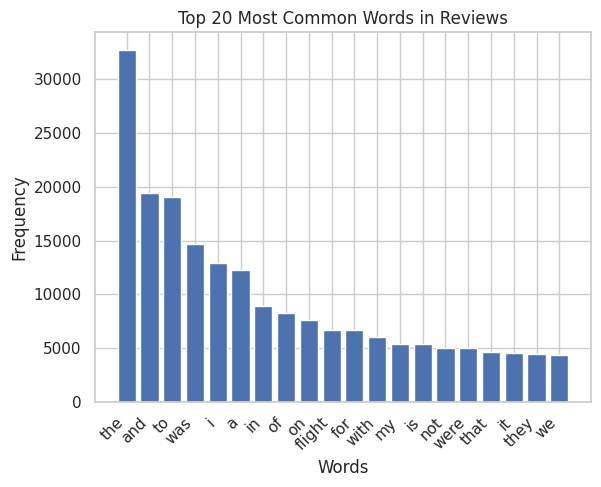

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" column
reviews = df_no_duplicates['review_text']

# Combine all reviews into a single string
all_reviews_text = ' '.join(reviews)

# Split the text into words
words = all_reviews_text.split()

# Filter out punctuation and convert to lowercase (if needed)
words = [word.lower().strip('.,!?()[]{}') for word in words]

# Create a Counter to count word occurrences
word_counts = Counter(words)

# Get the top N most common words
top_words = word_counts.most_common(20)

# Plot the histogram
labels, values = zip(*top_words)
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Reviews')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


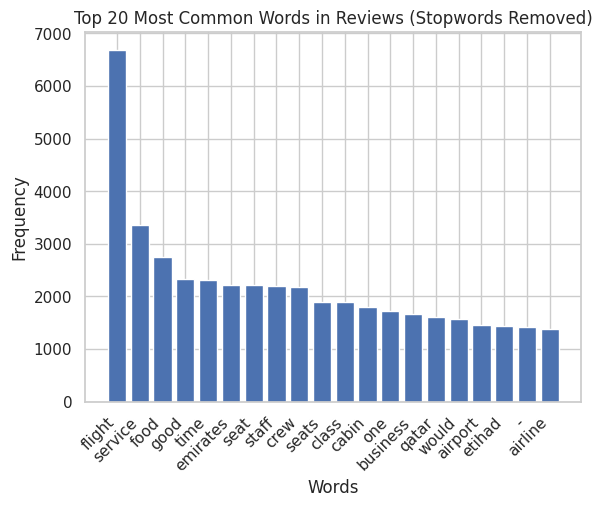

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" column
reviews = df_no_duplicates['review_text']

# Combine all reviews into a single string
all_reviews_text = ' '.join(reviews)

# Split the text into words
words = all_reviews_text.split()

# Filter out punctuation and convert to lowercase (if needed)
words = [word.lower().strip('.,!?()[]{}') for word in words]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Create a Counter to count word occurrences
word_counts = Counter(filtered_words)

# Get the top N most common words
top_words = word_counts.most_common(20)

# Plot the histogram
labels, values = zip(*top_words)
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Reviews (Stopwords Removed)')
plt.show()


In [ ]:
#Freqquency of words for negative sentiment reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


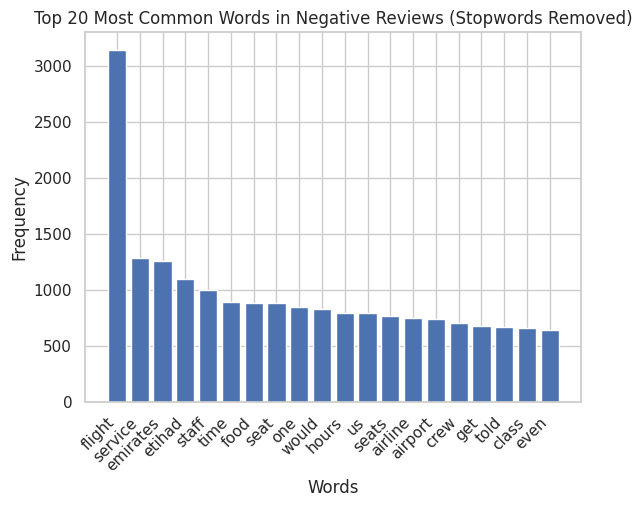

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" and "pos_neu_neg_review_score" columns
negative_reviews = df_no_duplicates[df_no_duplicates['pos_neu_neg_review_score'] == 'neg']['review_text']

# Combine all negative reviews into a single string
all_negative_reviews_text = ' '.join(negative_reviews)

# Split the text into words
words = all_negative_reviews_text.split()

# Filter out punctuation and convert to lowercase (if needed)
words = [word.lower().strip('.,!?()[]{}') for word in words]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Create a Counter to count word occurrences
word_counts = Counter(filtered_words)

# Get the top N most common words
top_words = word_counts.most_common(20)

# Plot the histogram
labels, values = zip(*top_words)
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Negative Reviews (Stopwords Removed)')
plt.show()


In [ ]:
##This tells that emirates and etihad has the many negative reviews ,lets validate it

In [ ]:
# Assuming df_no_duplicates is your DataFrame with the "airline" and "pos_neu_neg_review_score" columns

# Filter negative reviews for Etihad
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Calculate the total number of reviews and negative reviews for Etihad
etihad_total_reviews = len(df_no_duplicates[df_no_duplicates['airline'] == 'etihad'])
etihad_total_negative_reviews = len(etihad_negative_reviews)

# Calculate the percentage of negative reviews for Etihad
etihad_negative_percentage = (etihad_total_negative_reviews / etihad_total_reviews) * 100 if etihad_total_reviews > 0 else 0

print(f"Etihad: Total Reviews - {etihad_total_reviews}, Negative Reviews - {etihad_total_negative_reviews}, Negative Percentage - {etihad_negative_percentage:.2f}%")

# Repeat the process for Emirates
emirates_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'emirates') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

emirates_total_reviews = len(df_no_duplicates[df_no_duplicates['airline'] == 'emirates'])
emirates_total_negative_reviews = len(emirates_negative_reviews)

emirates_negative_percentage = (emirates_total_negative_reviews / emirates_total_reviews) * 100 if emirates_total_reviews > 0 else 0

print(f"Emirates: Total Reviews - {emirates_total_reviews}, Negative Reviews - {emirates_total_negative_reviews}, Negative Percentage - {emirates_negative_percentage:.2f}%")


Etihad: Total Reviews - 1098, Negative Reviews - 691, Negative Percentage - 62.93%
Emirates: Total Reviews - 1534, Negative Reviews - 683, Negative Percentage - 44.52%


In [ ]:
#it clearly states that Etihad has a lot of negative reviews around 62.93%. So lets dwelve more in etihad and try to figure what wrong

In [ ]:
#20 most frequent words in etihad with negative sentiment

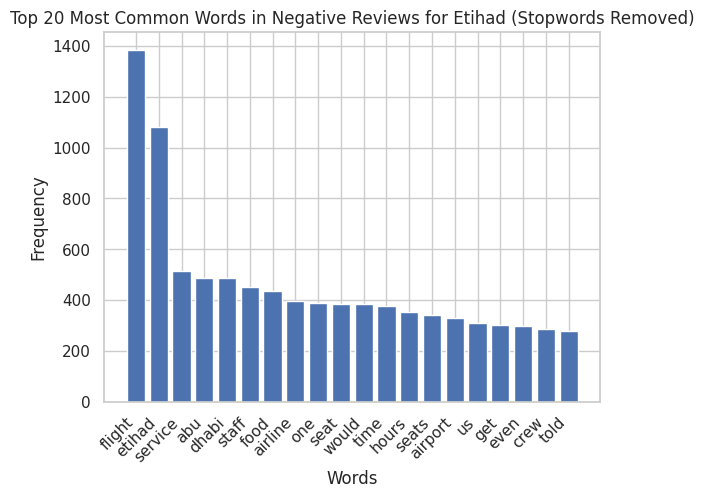

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Assuming df_no_duplicates is your DataFrame with the "review_text" and "pos_neu_neg_review_score" columns

# Filter negative reviews for Etihad
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Get the negative reviews for Etihad
negative_reviews_etihad = etihad_negative_reviews['review_text']

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(negative_reviews_etihad)

# Split the text into words
words_etihad = all_negative_reviews_text_etihad.split()

# Filter out punctuation and convert to lowercase (if needed)
words_etihad = [word.lower().strip('.,!?()[]{}') for word in words_etihad]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words_etihad = [word for word in words_etihad if word not in stop_words]

# Create a Counter to count word occurrences
word_counts_etihad = Counter(filtered_words_etihad)

# Get the top N most common words
top_words_etihad = word_counts_etihad.most_common(20)

# Plot the histogram
labels_etihad, values_etihad = zip(*top_words_etihad)
plt.bar(labels_etihad, values_etihad)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Negative Reviews for Etihad (Stopwords Removed)')
plt.show()


In [ ]:
## we can deduce that service is an issue with etihad and staff too . But its still not clear. Lets use 3-Grams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


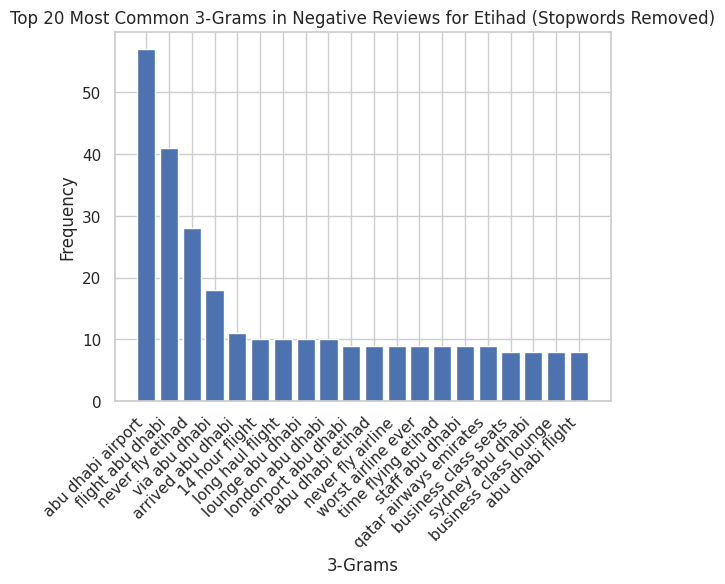

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import ngrams

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" and "pos_neu_neg_review_score" columns

# Filter negative reviews for Etihad
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Get the negative reviews for Etihad
negative_reviews_etihad = etihad_negative_reviews['review_text']

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(negative_reviews_etihad)

# Split the text into words
words_etihad = all_negative_reviews_text_etihad.split()

# Filter out punctuation and convert to lowercase (if needed)
words_etihad = [word.lower().strip('.,!?()[]{}') for word in words_etihad]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words_etihad = [word for word in words_etihad if word not in stop_words]

# Generate 3-grams
three_grams_etihad = ngrams(filtered_words_etihad, 3)

# Flatten the 3-grams into a list of strings
three_grams_list_etihad = [' '.join(gram) for gram in three_grams_etihad]

# Create a Counter to count 3-gram occurrences
three_gram_counts_etihad = Counter(three_grams_list_etihad)

# Get the top N most common 3-grams
top_three_grams_etihad = three_gram_counts_etihad.most_common(20)

# Unpack the tuples for plotting
labels_etihad, values_etihad = zip(*top_three_grams_etihad)

# Plot the histogram
plt.bar(labels_etihad, values_etihad)
plt.xticks(rotation=45, ha="right")
plt.xlabel('3-Grams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common 3-Grams in Negative Reviews for Etihad (Stopwords Removed)')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


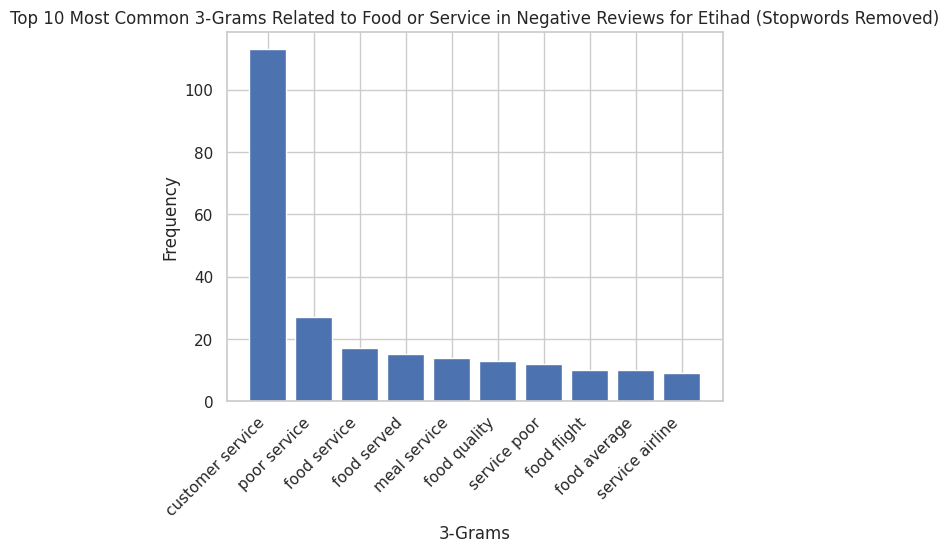

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import ngrams

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" and "pos_neu_neg_review_score" columns

# Filter negative reviews for Etihad
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Get the negative reviews for Etihad
negative_reviews_etihad = etihad_negative_reviews['review_text']

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(negative_reviews_etihad)

# Split the text into words
words_etihad = all_negative_reviews_text_etihad.split()

# Filter out punctuation and convert to lowercase (if needed)
words_etihad = [word.lower().strip('.,!?()[]{}') for word in words_etihad]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words_etihad = [word for word in words_etihad if word not in stop_words]

# Generate 3-grams
three_grams_etihad = ngrams(filtered_words_etihad, 2)

# Filter 3-grams containing keywords related to food or service
relevant_three_grams_etihad = [gram for gram in three_grams_etihad if 'food' in gram or 'service' in gram]

# Flatten the relevant 3-grams into a list of strings
relevant_three_grams_list_etihad = [' '.join(gram) for gram in relevant_three_grams_etihad]

# Create a Counter to count relevant 3-gram occurrences
relevant_three_gram_counts_etihad = Counter(relevant_three_grams_list_etihad)

# Get the top N most common relevant 3-grams
top_relevant_three_grams_etihad = relevant_three_gram_counts_etihad.most_common(10)

# Unpack the tuples for plotting
labels_etihad, values_etihad = zip(*top_relevant_three_grams_etihad)

# Plot the histogram
plt.bar(labels_etihad, values_etihad)
plt.xticks(rotation=45, ha="right")
plt.xlabel('3-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common 3-Grams Related to Food or Service in Negative Reviews for Etihad (Stopwords Removed)')
plt.show()


In [ ]:
#2 grams only for service in etihad

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


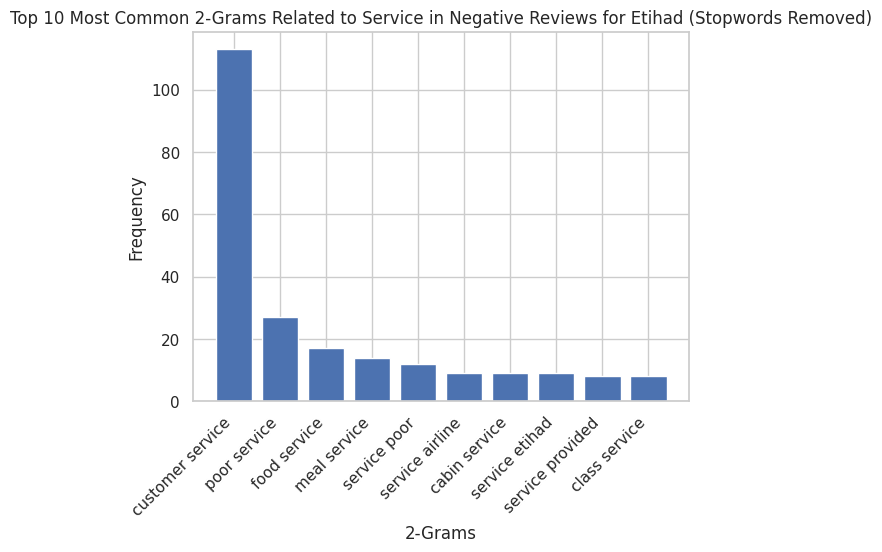

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import ngrams

# Download NLTK resources (stopwords)
nltk.download('stopwords')

# Assuming df_no_duplicates is your DataFrame with the "review_text" and "pos_neu_neg_review_score" columns

# Filter negative reviews for Etihad
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Get the negative reviews for Etihad
negative_reviews_etihad = etihad_negative_reviews['review_text']

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(negative_reviews_etihad)

# Split the text into words
words_etihad = all_negative_reviews_text_etihad.split()

# Filter out punctuation and convert to lowercase (if needed)
words_etihad = [word.lower().strip('.,!?()[]{}') for word in words_etihad]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words_etihad = [word for word in words_etihad if word not in stop_words]

# Generate 2-grams
two_grams_etihad = ngrams(filtered_words_etihad, 2)

# Filter 2-grams containing keywords related to service
relevant_two_grams_etihad = [gram for gram in two_grams_etihad if 'service' in gram]

# Flatten the relevant 2-grams into a list of strings
relevant_two_grams_list_etihad = [' '.join(gram) for gram in relevant_two_grams_etihad]

# Create a Counter to count relevant 2-gram occurrences
relevant_two_gram_counts_etihad = Counter(relevant_two_grams_list_etihad)

# Get the top N most common relevant 2-grams
top_relevant_two_grams_etihad = relevant_two_gram_counts_etihad.most_common(10)

# Unpack the tuples for plotting
labels_etihad, values_etihad = zip(*top_relevant_two_grams_etihad)

# Plot the histogram
plt.bar(labels_etihad, values_etihad)
plt.xticks(rotation=45, ha="right")
plt.xlabel('2-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common 2-Grams Related to Service in Negative Reviews for Etihad (Stopwords Removed)')
plt.show()


In [ ]:
pip install prettytable


In [ ]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.field_names = ["2-Gram", "Frequency"]

# Add data to the table
for label, value in zip(labels_etihad, values_etihad):
    table.add_row([label, value])

# Print the table
print(table)


+------------------+-----------+
|      2-Gram      | Frequency |
+------------------+-----------+
| customer service |    113    |
|   poor service   |     27    |
|   food service   |     17    |
|   meal service   |     14    |
|   service poor   |     12    |
| service airline  |     9     |
|  cabin service   |     9     |
|  service etihad  |     9     |
| service provided |     8     |
|  class service   |     8     |
+------------------+-----------+


In [ ]:
##Lets focus on customer service

In [ ]:
customer_service_reviews = [review for review in negative_reviews_etihad if 'customer service' in review.lower()]


In [ ]:
for review in customer_service_reviews[:100]:
    print(review)
    print('-' * 50)


 Of course, the airline never informed me that I was entitled to this, but I was able to contact the live chat service and ask whether I was entitled to it indeed they answered and gave me a set of instructions on how to complete the reservation prepaid by Etihad. The process was way harder than it should have, but I finally manage to get the confirmation email of the hotel. Etihad is already struggling to meet expectations at this point. On the night of the flight, I land in Abu Dhabi after a 7 hours flight, catch the taxi to the hotel at midnight and to my horror I am told that I have a reservation, but it has been cancelled by Etihad - I remain in disbelief but the hotel confirms this, I fire up my laptop and look for the Etihad chat service, it takes a lot of hurdles to speak with a human but I finally manage. It may as well been a robot: "HI my name is XXX XXX, how can I help you?" and from there it proceeds to tell me that the reservation was cancelled as the company later realiz

In [ ]:
##Lets see what is the most frequent words in customer_service

In [ ]:
from collections import Counter

# Combine all reviews into a single string
all_reviews_text_customer_service = ' '.join(customer_service_reviews)

# Split the text into words
words_customer_service = all_reviews_text_customer_service.split()

# Filter out punctuation and convert to lowercase (if needed)
words_customer_service = [word.lower().strip('.,!?()[]{}') for word in words_customer_service]

# Filter out stopwords (if needed)
stop_words = set(stopwords.words('english'))
filtered_words_customer_service = [word for word in words_customer_service if word not in stop_words]

# Create a Counter to count word occurrences
word_counts_customer_service = Counter(filtered_words_customer_service)

# Get the top N most common words
top_words_customer_service = word_counts_customer_service.most_common(10)

# Print the results
for word, count in top_words_customer_service:
    print(f'{word}: {count} occurrences')


flight: 240 occurrences
etihad: 190 occurrences
service: 156 occurrences
customer: 137 occurrences
would: 91 occurrences
staff: 79 occurrences
us: 73 occurrences
abu: 71 occurrences
dhabi: 70 occurrences
one: 68 occurrences


In [ ]:
# This doesnt provide much and only gives the obvious words, lets remove these and stopwords

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already downloaded NLTK resources (stopwords)
nltk.download('stopwords')

# Define words to exclude
exclude_words = ['flight', 'etihad', 'service', 'customer', 'would', 'abu', 'dhabi']

# Combine all reviews into a single string
all_reviews_text_customer_service = ' '.join(customer_service_reviews)

# Split the text into words
words_customer_service = all_reviews_text_customer_service.split()

# Filter out specified words and stopwords
stop_words = set(stopwords.words('english'))
filtered_words_customer_service = [word.lower().strip('.,!?()[]{}') for word in words_customer_service
                                   if word.lower() not in stop_words and word.lower() not in exclude_words]

# Create a Counter to count word occurrences
word_counts_customer_service = Counter(filtered_words_customer_service)

# Get the top N most common words
top_words_customer_service = word_counts_customer_service.most_common(10)

# Print the results
for word, count in top_words_customer_service:
    print(f'{word}: {count} occurrences')


staff: 79 occurrences
us: 73 occurrences
one: 68 occurrences
told: 63 occurrences
get: 62 occurrences
airline: 60 occurrences
airport: 60 occurrences
seats: 57 occurrences
hours: 56 occurrences
time: 55 occurrences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Staff is a big problem and seats also looks have problem, lets use 3 grams to see the bigger picture

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk import ngrams

# Assuming you have already downloaded NLTK resources (stopwords)
nltk.download('stopwords')

# Define words to exclude
exclude_words = ['flight', 'etihad', 'service', 'customer', 'would', 'abu', 'dhabi']

# Combine all reviews into a single string
all_reviews_text_customer_service = ' '.join(customer_service_reviews)

# Split the text into words
words_customer_service = all_reviews_text_customer_service.split()

# Filter out specified words and stopwords
stop_words = set(stopwords.words('english'))
filtered_words_customer_service = [word.lower().strip('.,!?()[]{}') for word in words_customer_service
                                   if word.lower() not in stop_words and word.lower() not in exclude_words]

# Generate 3-grams
three_grams_customer_service = ngrams(filtered_words_customer_service, 3)

# Create a Counter to count 3-gram occurrences
three_gram_counts_customer_service = Counter(three_grams_customer_service)

# Get the top N most common 3-grams
top_three_grams_customer_service = three_gram_counts_customer_service.most_common(10)

# Print the results
for gram, count in top_three_grams_customer_service:
    print(f'{gram}: {count} occurrences')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('things', 'go', 'wrong'): 3 occurrences
('book', 'return', 'ticket'): 3 occurrences
('pre', 'booked', 'seats'): 3 occurrences
('never', 'fly', 'again'): 3 occurrences
('send', 'confirmation', 'email'): 2 occurrences
('paying', 'extra', 'money'): 2 occurrences
('ottawa', 'airport', '4pm'): 2 occurrences
('able', 'get', 'boarding'): 2 occurrences
('hours', 'due', 'technical'): 2 occurrences
('issue', 'boarding', 'pass'): 2 occurrences


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk import ngrams

# Assuming you have already downloaded NLTK resources (stopwords)
nltk.download('stopwords')

# Define words to exclude
exclude_words = ['flight', 'etihad', 'service', 'customer', 'would', 'abu', 'dhabi']

# Combine all reviews into a single string
all_reviews_text_customer_service = ' '.join(customer_service_reviews)

# Split the text into words
words_customer_service = all_reviews_text_customer_service.split()

# Filter out specified words and stopwords
stop_words = set(stopwords.words('english'))
filtered_words_customer_service = [word.lower().strip('.,!?()[]{}') for word in words_customer_service
                                   if word.lower() not in stop_words and word.lower() not in exclude_words]

# Generate 2-grams
two_grams_customer_service = ngrams(filtered_words_customer_service, 2)

# Create a Counter to count 2-gram occurrences
two_gram_counts_customer_service = Counter(two_grams_customer_service)

# Get the top N most common 2-grams
top_two_grams_customer_service = two_gram_counts_customer_service.most_common(10)

# Print the results
for gram, count in top_two_grams_customer_service:
    print(f'{gram}: {count} occurrences')


('business', 'class'): 26 occurrences
('ground', 'staff'): 14 occurrences
('cabin', 'crew'): 13 occurrences
('air', 'miles'): 11 occurrences
('air', 'canada'): 11 occurrences
('boarding', 'pass'): 10 occurrences
('transfer', 'desk'): 9 occurrences
('2', 'hours'): 8 occurrences
('never', 'fly'): 8 occurrences
('economy', 'space'): 7 occurrences


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


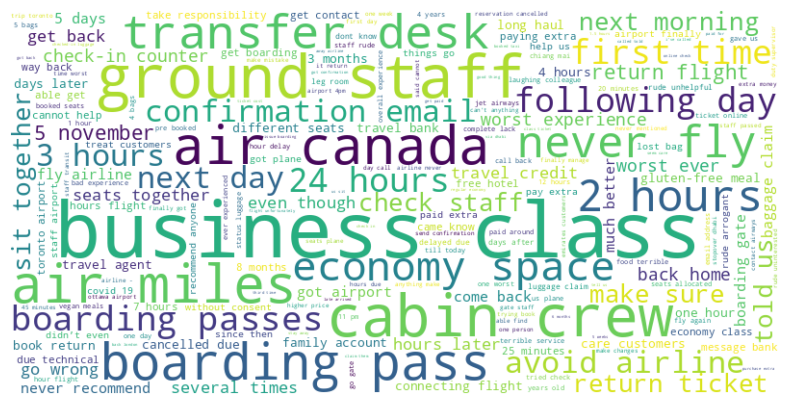

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

# Assuming you have already downloaded NLTK resources (stopwords)
nltk.download('stopwords')

# Define words to exclude
exclude_words = ['flight', 'etihad', 'service', 'customer', 'would', 'abu', 'dhabi']

# Combine all reviews into a single string
all_reviews_text_customer_service = ' '.join(customer_service_reviews)

# Split the text into words
words_customer_service = all_reviews_text_customer_service.split()

# Filter out specified words and stopwords
stop_words = set(stopwords.words('english'))
filtered_words_customer_service = [word.lower().strip('.,!?()[]{}') for word in words_customer_service
                                   if word.lower() not in stop_words and word.lower() not in exclude_words]

# Generate 2-grams
two_grams_customer_service = ngrams(filtered_words_customer_service, 2)

# Flatten 2-grams into a list of strings
two_grams_list_customer_service = [' '.join(gram) for gram in two_grams_customer_service]

# Create a Counter to count 2-gram occurrences
two_gram_counts_customer_service = Counter(two_grams_list_customer_service)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(two_gram_counts_customer_service)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#Topic Modeling

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk import ngrams
import string
import nltk

# Download NLTK resources (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(etihad_negative_reviews['review_text'])

# Tokenize the text into bigrams
tokens = word_tokenize(all_negative_reviews_text_etihad.lower())
bigrams = list(ngrams(tokens, 2))

# Filter out stopwords and punctuation
stop_words = set(stopwords.words('english'))
bigrams = [' '.join(bigram) for bigram in bigrams if all(word.isalnum() and word not in stop_words for word in bigram)]

# Create a dictionary and corpus
dictionary = corpora.Dictionary([bigrams])
corpus = [dictionary.doc2bow(bigrams)]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary, passes=10)

# Print the topics
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id + 1}: {topic}')

# Compute coherence score for model evaluation
coherence_model = CoherenceModel(model=lda_model, texts=[bigrams], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f'\nCoherence Score: {coherence_score}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: 0.000*"abu dhabi" + 0.000*"business class" + 0.000*"etihad airways" + 0.000*"customer service" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"connecting flight" + 0.000*"boarding pass" + 0.000*"return flight" + 0.000*"dhabi airport"
Topic 2: 0.000*"abu dhabi" + 0.000*"business class" + 0.000*"customer service" + 0.000*"etihad airways" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"dhabi airport" + 0.000*"return flight" + 0.000*"connecting flight" + 0.000*"never fly"
Topic 3: 0.000*"abu dhabi" + 0.000*"business class" + 0.000*"etihad airways" + 0.000*"cabin crew" + 0.000*"customer service" + 0.000*"ground staff" + 0.000*"dhabi airport" + 0.000*"boarding pass" + 0.000*"never fly" + 0.000*"connecting flight"
Topic 4: 0.000*"abu dhabi" + 0.000*"etihad airways" + 0.000*"customer service" + 0.000*"business class" + 0.000*"cabin crew" + 0.000*"dhabi airport" + 0.000*"return flight" + 0.000*"connecting flight" + 0.000*"ground staff" + 0.000*"even though"
Topic 5: 0.023*"ab

In [ ]:
# In this abu dhabi is in every flight,
# pretty obvious because most of the etihad flight operated from abu dabhi. Lets do the BI GRAM and remove
# 'flight', 'etihad', 'service', 'customer', 'would', 'abu', 'dhabi' since doesnt provide additional information

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk import ngrams
import string
import nltk

# Download NLTK resources (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(etihad_negative_reviews['review_text'])

# Tokenize the text into bigrams
tokens = word_tokenize(all_negative_reviews_text_etihad.lower())
bigrams = list(ngrams(tokens, 2))

# Define custom stopwords to exclude specific words
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi"])

# Filter out stopwords and specific words
bigrams = [' '.join(bigram) for bigram in bigrams if all(word.isalnum() and word not in custom_stopwords for word in bigram)]

# Create a dictionary and corpus
dictionary = corpora.Dictionary([bigrams])
corpus = [dictionary.doc2bow(bigrams)]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

# Print the topics
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id + 1}: {topic}')

# Compute coherence score for model evaluation
coherence_model = CoherenceModel(model=lda_model, texts=[bigrams], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f'\nCoherence Score: {coherence_score}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: 0.000*"business class" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"boarding pass" + 0.000*"2 hours" + 0.000*"never fly" + 0.000*"3 hours" + 0.000*"even though" + 0.000*"economy class" + 0.000*"long haul"
Topic 2: 0.000*"business class" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"never fly" + 0.000*"boarding pass" + 0.000*"3 hours" + 0.000*"even though" + 0.000*"2 hours" + 0.000*"economy class" + 0.000*"first time"
Topic 3: 0.000*"business class" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"even though" + 0.000*"never fly" + 0.000*"2 hours" + 0.000*"boarding pass" + 0.000*"3 hours" + 0.000*"long haul" + 0.000*"economy class"
Topic 4: 0.009*"business class" + 0.006*"cabin crew" + 0.004*"ground staff" + 0.003*"never fly" + 0.002*"2 hours" + 0.002*"boarding pass" + 0.002*"even though" + 0.002*"3 hours" + 0.002*"economy class" + 0.002*"transfer desk"
Topic 5: 0.000*"business class" + 0.000*"cabin crew" + 0.000*"ground staff" + 0.000*"never fly" + 0.000*"2 

In [ ]:
#TRI GRAM

In [ ]:
import nltk

# Download WordNet
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(etihad_negative_reviews['review_text'])

# Tokenize the text into trigrams and handle contractions
tokens = word_tokenize(all_negative_reviews_text_etihad.lower())
tokens = [re.sub(r"\'s", " is", token) for token in tokens]  # Expand contractions

# Remove stopwords
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi"])
filtered_tokens = [token for token in tokens if token.isalnum() and token not in custom_stopwords]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Create trigrams
trigrams = list(ngrams(lemmatized_tokens, 3))

# Print some information to debug
print(f"Number of negative reviews: {len(etihad_negative_reviews)}")
print(f"Number of tokens: {len(lemmatized_tokens)}")
print(f"Number of trigrams: {len(trigrams)}")

# Define custom stopwords to exclude specific words
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi"])

# Filter out stopwords and specific words
filtered_trigrams = [' '.join(trigram) for trigram in trigrams]

# Print some information to debug
print(f"Number of trigrams after filtering: {len(filtered_trigrams)}")
print(f"Sample trigrams: {filtered_trigrams[:10]}")  # Print some trigrams for inspection

# Check if any trigrams remain after filtering
if not filtered_trigrams:
    print("No trigrams remain after filtering. Please adjust your filtering criteria.")
else:
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary([filtered_trigrams])
    corpus = [dictionary.doc2bow(filtered_trigrams)]

    # Print some information to debug
    print(f"Number of documents in the corpus: {len(corpus)}")

    # Build the LDA model
    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

    # Print the topics
    for topic_id, topic in lda_model.print_topics():
        print(f'Topic {topic_id + 1}: {topic}')

    # Compute coherence score for model evaluation
    coherence_model = CoherenceModel(model=lda_model, texts=[filtered_trigrams], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f'\nCoherence Score: {coherence_score}')


Number of negative reviews: 691
Number of tokens: 56320
Number of trigrams: 56318
Number of trigrams after filtering: 56318
Sample trigrams: ['consequently review primarily', 'review primarily regarding', 'primarily regarding office', 'regarding office operation', 'office operation taken', 'operation taken airline', 'taken airline 2', 'airline 2 month', '2 month multiple', 'month multiple contact']
Number of documents in the corpus: 1
Topic 1: 0.000*"worst airline ever" + 0.000*"qatar airway emirate" + 0.000*"business class seat" + 0.000*"business class lounge" + 0.000*"never fly airline" + 0.000*"neighbour free seat" + 0.000*"business class passenger" + 0.000*"business class ticket" + 0.000*"leg room seat" + 0.000*"business class cabin"
Topic 2: 0.000*"worst airline ever" + 0.000*"business class passenger" + 0.000*"business class seat" + 0.000*"worst experience ever" + 0.000*"qatar airway emirate" + 0.000*"never fly airline" + 0.000*"business class lounge" + 0.000*"neighbour free seat

###QUADRIGRAM
THIS TIME ADDING STOPWORDS LIKE worst, airline, ever,FLY,NEVER TO GET MORE CONCISE TOPICS

In [ ]:
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Phrases
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(etihad_negative_reviews['review_text'])

# Tokenize the text into quadrigrams and handle contractions
tokens = word_tokenize(all_negative_reviews_text_etihad.lower())
tokens = [re.sub(r"\'s", " is", token) for token in tokens]  # Expand contractions

# Remove stopwords
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi","worst","airline","ever","fly","never"])
filtered_tokens = [token for token in tokens if token.isalnum() and token not in custom_stopwords]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Create quadrigrams
quadrigram_phrases = Phrases([lemmatized_tokens], min_count=1, threshold=1)
quadrigram_tokens = quadrigram_phrases[lemmatized_tokens]
quadrigrams = list(ngrams(quadrigram_tokens, 4))

# Print some information to debug
print(f"Number of negative reviews: {len(etihad_negative_reviews)}")
print(f"Number of tokens: {len(lemmatized_tokens)}")
print(f"Number of quadrigrams: {len(quadrigrams)}")

# Define custom stopwords to exclude specific words
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi","worst","airline","ever","fly","never"])

# Filter out stopwords and specific words
filtered_quadrigrams = [' '.join(quadrigram) for quadrigram in quadrigrams]

# Print some information to debug
print(f"Number of quadrigrams after filtering: {len(filtered_quadrigrams)}")
print(f"Sample quadrigrams: {filtered_quadrigrams[:10]}")  # Print some quadrigrams for inspection

# Check if any quadrigrams remain after filtering
if not filtered_quadrigrams:
    print("No quadrigrams remain after filtering. Please adjust your filtering criteria.")
else:
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary([filtered_quadrigrams])
    corpus = [dictionary.doc2bow(filtered_quadrigrams)]

    # Print some information to debug
    print(f"Number of documents in the corpus: {len(corpus)}")

    # Build the LDA model
    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

    # Print the topics
    for topic_id, topic in lda_model.print_topics():
        print(f'Topic {topic_id + 1}: {topic}')

    # Compute coherence score for model evaluation
    coherence_model = CoherenceModel(model=lda_model, texts=[filtered_quadrigrams], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f'\nCoherence Score: {coherence_score}')


Number of negative reviews: 691
Number of tokens: 55222
Number of quadrigrams: 44118
Number of quadrigrams after filtering: 44118
Sample quadrigrams: ['consequently review primarily regarding', 'review primarily regarding office', 'primarily regarding office operation', 'regarding office operation taken', 'office operation taken airline', 'operation taken airline 2_month', 'taken airline 2_month multiple', 'airline 2_month multiple contact', '2_month multiple contact misdirection', 'multiple contact misdirection inform']
Number of documents in the corpus: 1
Topic 1: 0.000*"5ft 4 female squashed" + 0.000*"issue_said forwarded refund department" + 0.000*"jostling join queue seat_plane" + 0.000*"compared choose recommend bad_experience" + 0.000*"return bus_journey bus station" + 0.000*"regulation passenger_flying uk 6_hour" + 0.000*"member_check business_class desk former" + 0.000*"forward food_last bangkok amongst" + 0.000*"work time first germany" + 0.000*"queue airbridge everyone_else 

Now, let's interpret the insights from the generated topics:

Topic 1: Issues related to design, cost-cutting, and lowering standards.
Topic 2: Complaints about organizational issues, luggage, and seat arrangements.

Topic 3: Complaints about customer service, changing seats, and filing official complaints.

Topic 4: Complaints about unwelcoming atmosphere, small food portions, and flight information changes.

Topic 5: Complaints about inconvenient flight changes, airport conditions, and upgrade issues.

Topic 6: Complaints about fees, incorrect information, and uncomfortable seating.

Topic 7: Issues with screens, seat comfort, boarding gate staff, and additional charges.

Topic 8: Complaints about boarding pass issues, waiting conditions, and lost luggage reimbursement.

Topic 9: Issues related to compensation, flight delays, and crew rudeness.

Topic 10: Complaints about online purchases, rejected boarding, and inconsistent treatment.

In [ ]:
#6-GRAMS

In [ ]:
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Phrases
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all negative reviews into a single string
all_negative_reviews_text_etihad = ' '.join(etihad_negative_reviews['review_text'])

# Tokenize the text into hexagrams and handle contractions
tokens = word_tokenize(all_negative_reviews_text_etihad.lower())
tokens = [re.sub(r"\'s", " is", token) for token in tokens]  # Expand contractions

# Remove stopwords
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi", "worst", "airline", "ever", "fly", "never"])
filtered_tokens = [token for token in tokens if token.isalnum() and token not in custom_stopwords]

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Create hexagrams
hexagram_phrases = Phrases([lemmatized_tokens], min_count=1, threshold=1)
hexagram_tokens = hexagram_phrases[lemmatized_tokens]
hexagrams = list(ngrams(hexagram_tokens, 6))

# Print some information to debug
print(f"Number of negative reviews: {len(etihad_negative_reviews)}")
print(f"Number of tokens: {len(lemmatized_tokens)}")
print(f"Number of hexagrams: {len(hexagrams)}")

# Define custom stopwords to exclude specific words
custom_stopwords = set(stopwords.words('english') + ["flight", "etihad", "service", "customer", "would", "abu", "dhabi", "worst", "airline", "ever", "fly", "never"])

# Filter out stopwords and specific words
filtered_hexagrams = [' '.join(hexagram) for hexagram in hexagrams]

# Print some information to debug
print(f"Number of hexagrams after filtering: {len(filtered_hexagrams)}")
print(f"Sample hexagrams: {filtered_hexagrams[:10]}")  # Print some hexagrams for inspection

# Check if any hexagrams remain after filtering
if not filtered_hexagrams:
    print("No hexagrams remain after filtering. Please adjust your filtering criteria.")
else:
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary([filtered_hexagrams])
    corpus = [dictionary.doc2bow(filtered_hexagrams)]

    # Print some information to debug
    print(f"Number of documents in the corpus: {len(corpus)}")

    # Build the LDA model
    lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=50)

    # Print the topics
    for topic_id, topic in lda_model.print_topics():
        print(f'Topic {topic_id + 1}: {topic}')

    # Compute coherence score for model evaluation
    coherence_model = CoherenceModel(model=lda_model, texts=[filtered_hexagrams], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    print(f'\nCoherence Score: {coherence_score}')


Number of negative reviews: 691
Number of tokens: 55222
Number of hexagrams: 44116
Number of hexagrams after filtering: 44116
Sample hexagrams: ['consequently review primarily regarding office operation', 'review primarily regarding office operation taken', 'primarily regarding office operation taken airline', 'regarding office operation taken airline 2_month', 'office operation taken airline 2_month multiple', 'operation taken airline 2_month multiple contact', 'taken airline 2_month multiple contact misdirection', 'airline 2_month multiple contact misdirection inform', '2_month multiple contact misdirection inform need_contact', 'multiple contact misdirection inform need_contact american_airline']
Number of documents in the corpus: 1
Topic 1: 0.000*"however doubt using food_quality worse_budget bread_roll" + 0.000*"keep mind child pregnant lady board" + 0.000*"still_2 security_check 1 whilst transferring arrival" + 0.000*"came klm boeing_787 attendant simply superb" + 0.000*"guy_coun

Based on the insights from both 6-grams and 4-grams analyses, here are consolidated suggestions for improvement:

Enhance Communication and Customer Service:



*   Improve communication during delays and disruptions.
*   LStrengthen customer service response times for effective assistance.





Optimize Boarding Process:



*   Address issues causing disorganization in the boarding process.





Minimize Airport Wait Times:

*   Explore ways to reduce excessive wait times, especially during layovers.




Improve In-Flight Meals:

*   Enhance the quality and variety of in-flight meals based on passenger preferences.




Upgrade Seat Comfort:

*   Invest in improving seat comfort, especially in economy class.




Address Entertainment System Issues:

*   Resolve technical problems with the entertainment system for a seamless experience.




Streamline Operational Responses:

*   Implement efficient procedures for addressing reported issues promptly.


Evaluate and Adjust Pricing Policies:

*   Assess pricing strategies to align with customer expectations and provide value for money.





In [ ]:
pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039294 sha256=3851a253175197995b0b5425176645f739472d892b0f0ffafec23de166cd9809
  Stored in di

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

# Assuming df_no_duplicates is your DataFrame with the relevant columns
etihad_negative_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'etihad') & (df_no_duplicates['pos_neu_neg_review_score'] == 'neg')]

# Combine all positive reviews into a list
all_negative_reviews_text_etihad = etihad_negative_reviews['review_text'].tolist()

# Clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function to each review
cleaned_reviews_etihad = [clean_text(review) for review in all_negative_reviews_text_etihad]

# Remove empty documents
cleaned_reviews_etihad = [review for review in cleaned_reviews_etihad if len(review) > 0]

# Check if there are still reviews remaining
if not cleaned_reviews_etihad:
    print("No valid reviews remaining after cleaning.")
else:
    # Create 4-grams
    four_grams_qatar = ngrams(cleaned_reviews_etihad, 4)

    # Flatten the 4-grams into a list of strings
    four_grams_list_etihad = [' '.join(gram) for gram in four_grams_qatar]

    # Use BERTopic for topic modeling
    topic_model_etihad = BERTopic()
    topics_etihad, _ = topic_model_etihad.fit_transform(four_grams_list_etihad)

    # Get the most frequent topics
    most_frequent_topics_etihad = topic_model_etihad.get_topic_freq().head(10)

    # Print the most frequent topics
    print(most_frequent_topics_etihad)

    # Save the topics and their frequencies to a DataFrame
    topics_df_etihad = pd.DataFrame({'Topic': most_frequent_topics_etihad['Topic'], 'Frequency': most_frequent_topics_etihad['Count']})

    # Print the DataFrame
    print(topics_df_etihad)


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

   Topic  Count
0     -1    368
2      0     59
4      1     51
1      2     47
7      3     42
8      4     35
3      5     26
6      6     23
5      7     22
9      8     14
   Topic  Frequency
0     -1        368
2      0         59
4      1         51
1      2         47
7      3         42
8      4         35
3      5         26
6      6         23
5      7         22
9      8         14


In [ ]:

# Define a function to get reviews for a specific topic
def get_reviews_for_topic(all_reviews, topic_assignments, target_topic):
    indices_for_topic = [index for index, topic in enumerate(topic_assignments) if topic == target_topic]
    reviews_for_topic = [all_reviews[index] for index in indices_for_topic]
    return reviews_for_topic

# Iterate through topics and analyze reviews
for topic_number in range(len(most_frequent_topics_etihad)):
    # Specify the target topic
    target_topic = most_frequent_topics_etihad.iloc[topic_number]['Topic']

    # Retrieve reviews for the specified topic
    reviews_for_topic = get_reviews_for_topic(all_negative_reviews_text_etihad, topics_etihad, target_topic)

    # Print the topic number and reviews for analysis
    print(f"Topic {target_topic} - Common Themes:")
    for review in reviews_for_topic[:5]:  # Print the first 5 reviews for brevity
        print(review)
    print("\n")


Topic -1 - Common Themes:
 Consequently, this review is primarily regarding Ground/Back Office Operations. It has taken the Airlines more than 2 months and multiple contacts and misdirection to inform me that I need to contact American Airlines to claim Frequent Flier miles, in spite my having specified my AA number on the reservation! There appears to be very little coordination between Etihad and Abu Dhabi Customs in terms of disallowed items et al and I was detained for carrying clearly labelled medications, threatened with imprisonment and fined. Needing my medication, I visited a medical institution in Abu Dhabi, and paid for a doctors's consultation and a prescription! My subsequent flight to JFK was delayed by a whole day but the way the Airline handled Hotel and transport for the delayed passengers can only be described as chaotic.
 I followed all the procedures that needed to be followed, I called their useless customer/ luggage center on a daily basis, but nothing much has ch

In [ ]:
#NEXT IS IN MANY REVIEWS OF ETIHAD PEOPLE ARE COMPARING ETIHAD WITH QATAR AND EMIRATES. So the analysis on that.

## Comparetive benchmarking with qatar

In [ ]:
#TOPIC MODELNG WITH 4 GRAMS

In [ ]:
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Phrases
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize

# Assuming df_no_duplicates is your DataFrame with the relevant columns
qatar_positive_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'qatar') & (df_no_duplicates['pos_neu_neg_review_score'] == 'pos')]

# Combine all positive reviews into a single string
all_positive_reviews_text_qatar = ' '.join(qatar_positive_reviews['review_text'])

# Tokenize the text into quadrigrams and handle contractions
tokens_qatar = word_tokenize(all_positive_reviews_text_qatar.lower())
tokens_qatar = [re.sub(r"\'s", " is", token) for token in tokens_qatar]  # Expand contractions

# Remove stopwords
custom_stopwords_qatar = set(stopwords.words('english') + ["flight", "qatar", "service", "customer", "would", "doha", "airline", "great", "excellent", "best"])
filtered_tokens_qatar = [token for token in tokens_qatar if token.isalnum() and token not in custom_stopwords_qatar]

# Lemmatize the tokens
lemmatizer_qatar = WordNetLemmatizer()
lemmatized_tokens_qatar = [lemmatizer_qatar.lemmatize(token) for token in filtered_tokens_qatar]

# Create quadrigrams
quadrigram_phrases_qatar = Phrases([lemmatized_tokens_qatar], min_count=1, threshold=1)
quadrigram_tokens_qatar = quadrigram_phrases_qatar[lemmatized_tokens_qatar]
quadrigrams_qatar = list(ngrams(quadrigram_tokens_qatar, 4))

# Print some information to debug
print(f"Number of positive reviews for Qatar Airways: {len(qatar_positive_reviews)}")
print(f"Number of tokens: {len(lemmatized_tokens_qatar)}")
print(f"Number of quadrigrams: {len(quadrigrams_qatar)}")

# Define custom stopwords to exclude specific words
custom_stopwords_qatar = set(stopwords.words('english') + ["flight", "qatar", "service", "customer", "would", "doha", "airline", "great", "excellent", "best"])

# Filter out stopwords and specific words
filtered_quadrigrams_qatar = [' '.join(quadrigram) for quadrigram in quadrigrams_qatar]

# Print some information to debug
print(f"Number of quadrigrams after filtering: {len(filtered_quadrigrams_qatar)}")
print(f"Sample quadrigrams: {filtered_quadrigrams_qatar[:10]}")  # Print some quadrigrams for inspection

# Check if any quadrigrams remain after filtering
if not filtered_quadrigrams_qatar:
    print("No quadrigrams remain after filtering. Please adjust your filtering criteria.")
else:
    # Create a dictionary and corpus
    dictionary_qatar = corpora.Dictionary([filtered_quadrigrams_qatar])
    corpus_qatar = [dictionary_qatar.doc2bow(filtered_quadrigrams_qatar)]

    # Print some information to debug
    print(f"Number of documents in the corpus: {len(corpus_qatar)}")

    # Build the LDA model
    lda_model_qatar = LdaModel(corpus_qatar, num_topics=10, id2word=dictionary_qatar, passes=100)

    # Print the topics
    for topic_id, topic in lda_model_qatar.print_topics():
        print(f'Topic {topic_id + 1}: {topic}')

    # Compute coherence score for model evaluation
    coherence_model_qatar = CoherenceModel(model=lda_model_qatar, texts=[filtered_quadrigrams_qatar], dictionary=dictionary_qatar, coherence='c_v')
    coherence_score_qatar = coherence_model_qatar.get_coherence()

    print(f'\nCoherence Score for Qatar Airways: {coherence_score_qatar}')


Number of positive reviews for Qatar Airways: 1247
Number of tokens: 67775
Number of quadrigrams: 51870
Number of quadrigrams after filtering: 51870
Sample quadrigrams: ['whole_experience booking traveling end', 'booking traveling end destination', 'traveling end destination professional', 'end destination professional easy_make', 'destination professional easy_make change', 'professional easy_make change return_journey', 'easy_make change return_journey called', 'change return_journey called hour', 'return_journey called hour time_call', 'called hour time_call answered']
Number of documents in the corpus: 1
Topic 1: 0.000*"painless possible remarkable job" + 0.000*"painless movenpick tower suite" + 0.000*"pair staff_come round meal" + 0.000*"pair shiraz divine touched" + 0.000*"painless work inflight_entertainment system" + 0.000*"pajama bed turndown despite_still" + 0.000*"painful ear eye please" + 0.000*"painful take_long time however" + 0.000*"pajama commemorating world_cup quite" 

In [ ]:
#6-grams

In [ ]:
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Phrases
from gensim.models import LdaModel
from gensim import corpora
from gensim.models import CoherenceModel

# Assuming df_no_duplicates is your DataFrame with the relevant columns
qatar_positive_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'qatar') & (df_no_duplicates['pos_neu_neg_review_score'] == 'pos')]

# Combine all positive reviews into a single string
all_positive_reviews_text_qatar = ' '.join(qatar_positive_reviews['review_text'])

# Tokenize the text into hexagrams and handle contractions
tokens_qatar = word_tokenize(all_positive_reviews_text_qatar.lower())
tokens_qatar = [re.sub(r"\'s", " is", token) for token in tokens_qatar]  # Expand contractions

# Remove stopwords including 'painless'
custom_stopwords_qatar = set(stopwords.words('english') + ["flight", "qatar", "service", "customer", "would", "doha", "best", "airline", "ever", "fly", "never", "painless"])
filtered_tokens_qatar = [token for token in tokens_qatar if token.isalnum() and token not in custom_stopwords_qatar]

# Lemmatize the tokens
lemmatizer_qatar = WordNetLemmatizer()
lemmatized_tokens_qatar = [lemmatizer_qatar.lemmatize(token) for token in filtered_tokens_qatar]

# Create hexigrams
hexigram_phrases_qatar = Phrases([lemmatized_tokens_qatar], min_count=1, threshold=1)
hexigram_tokens_qatar = hexigram_phrases_qatar[lemmatized_tokens_qatar]
hexigrams_qatar = list(ngrams(hexigram_tokens_qatar, 6))

# Print some information to debug
print(f"Number of positive reviews: {len(qatar_positive_reviews)}")
print(f"Number of tokens: {len(lemmatized_tokens_qatar)}")
print(f"Number of hexigrams: {len(hexigrams_qatar)}")

# Define custom stopwords to exclude specific words
custom_stopwords_qatar = set(stopwords.words('english') + ["flight", "qatar", "service", "customer", "would", "doha", "best", "airline", "ever", "fly", "never", "painless"])

# Filter out stopwords and specific words
filtered_hexigrams_qatar = [' '.join(hexigram) for hexigram in hexigrams_qatar]

# Print some information to debug
print(f"Number of hexigrams after filtering: {len(filtered_hexigrams_qatar)}")
print(f"Sample hexigrams: {filtered_hexigrams_qatar[:10]}")  # Print some hexigrams for inspection

# Check if any hexigrams remain after filtering
if not filtered_hexigrams_qatar:
    print("No hexigrams remain after filtering. Please adjust your filtering criteria.")
else:
    # Create a dictionary and corpus
    dictionary_qatar = corpora.Dictionary([filtered_hexigrams_qatar])
    corpus_qatar = [dictionary_qatar.doc2bow(filtered_hexigrams_qatar)]

    # Print some information to debug
    print(f"Number of documents in the corpus: {len(corpus_qatar)}")

    # Build the LDA model
    lda_model_qatar = LdaModel(corpus_qatar, num_topics=10, id2word=dictionary_qatar, passes=100)

    # Print the topics
    for topic_id, topic in lda_model_qatar.print_topics():
        print(f'Topic {topic_id + 1}: {topic}')

    # Compute coherence score for model evaluation
    coherence_model_qatar = CoherenceModel(model=lda_model_qatar, texts=[filtered_hexigrams_qatar], dictionary=dictionary_qatar, coherence='c_v')
    coherence_score_qatar = coherence_model_qatar.get_coherence()

    print(f'\nCoherence Score: {coherence_score_qatar}')


Number of positive reviews: 1247
Number of tokens: 68295
Number of hexigrams: 52212
Number of hexigrams after filtering: 52212
Sample hexigrams: ['whole_experience booking traveling end destination professional', 'booking traveling end destination professional easy_make', 'traveling end destination professional easy_make change', 'end destination professional easy_make change return_journey', 'destination professional easy_make change return_journey called', 'professional easy_make change return_journey called hour', 'easy_make change return_journey called hour time_call', 'change return_journey called hour time_call answered', 'return_journey called hour time_call answered straight_away', 'called hour time_call answered straight_away lady']
Number of documents in the corpus: 1
Topic 1: 0.000*"overnight syd containing eyeshade earplug sockettes" + 0.000*"overnight stay end satisfied major_issue cairo" + 0.000*"overnight_kit armani account time_arrival wonderful_experience flying_airway

##TOPIC MODELING WITH BERTOPIC FOR COMPARATIVE BECHMARKING  
#### QATAR POSITIVE SENTIMENT COMMON THEME

In [ ]:
pip install bertopic


In [ ]:
#4-gram

In [214]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams

# Assuming df_no_duplicates is your DataFrame with the relevant columns
qatar_positive_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'qatar') & (df_no_duplicates['pos_neu_neg_review_score'] == 'pos')]

# Combine all positive reviews into a list
all_positive_reviews_text_qatar = qatar_positive_reviews['review_text'].tolist()

# Clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function to each review
cleaned_reviews_qatar = [clean_text(review) for review in all_positive_reviews_text_qatar]

# Remove empty documents
cleaned_reviews_qatar = [review for review in cleaned_reviews_qatar if len(review) > 0]

# Check if there are still reviews remaining
if not cleaned_reviews_qatar:
    print("No valid reviews remaining after cleaning.")
else:
    # Create 4-grams
    four_grams_qatar = ngrams(cleaned_reviews_qatar, 4)

    # Flatten the 4-grams into a list of strings
    four_grams_list_qatar = [' '.join(gram) for gram in four_grams_qatar]

    # Use BERTopic for topic modeling
    topic_model_qatar = BERTopic()
    topics_qatar, _ = topic_model_qatar.fit_transform(four_grams_list_qatar)

    # Get the most frequent topics
    most_frequent_topics_qatar = topic_model_qatar.get_topic_freq().head(10)

    # Print the most frequent topics
    print(most_frequent_topics_qatar)

    # Save the topics and their frequencies to a DataFrame
    topics_df_qatar = pd.DataFrame({'Topic': most_frequent_topics_qatar['Topic'], 'Frequency': most_frequent_topics_qatar['Count']})

    # Print the DataFrame
    print(topics_df_qatar)


    Topic  Count
1      -1    506
0       0    275
4       1    197
2       2     61
3       3     42
7       4     37
10      5     26
6       6     24
9       7     19
12      8     18
    Topic  Frequency
1      -1        506
0       0        275
4       1        197
2       2         61
3       3         42
7       4         37
10      5         26
6       6         24
9       7         19
12      8         18


In [216]:
    # Reduce outliers using topic_model.reduce_outliers
    topics_qatar = topic_model_qatar.reduce_outliers(four_grams_list_qatar, topics_qatar)

    # Get the most frequent topics
    most_frequent_topics_qatar = topic_model_qatar.get_topic_freq().head(10)

    # Print the most frequent topics
    print(most_frequent_topics_qatar)

    # Save the topics and their frequencies to a DataFrame
    topics_df_qatar = pd.DataFrame({'Topic': most_frequent_topics_qatar['Topic'], 'Frequency': most_frequent_topics_qatar['Count']})

    # Print the DataFrame
    print(topics_df_qatar)

    Topic  Count
1      -1    506
0       0    275
4       1    197
2       2     61
3       3     42
7       4     37
10      5     26
6       6     24
9       7     19
12      8     18
    Topic  Frequency
1      -1        506
0       0        275
4       1        197
2       2         61
3       3         42
7       4         37
10      5         26
6       6         24
9       7         19
12      8         18


### BERTopic with more advancement

In [220]:
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd

# Assuming df_no_duplicates is your DataFrame with the relevant columns
qatar_positive_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'qatar') & (df_no_duplicates['pos_neu_neg_review_score'] == 'pos')]

# Combine all positive reviews into a list
all_positive_reviews_text_qatar = qatar_positive_reviews['review_text'].tolist()

# Use a pre-trained sentence embedding model
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings_qatar = sentence_model.encode(all_positive_reviews_text_qatar, show_progress_bar=True)

# Apply UMAP for dimensionality reduction
umap_model_qatar = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine')
reduced_embeddings_qatar = umap_model_qatar.fit_transform(embeddings_qatar)

topic_model_qatar = BERTopic(vectorizer_model=None, embedding_model=None, umap_model=umap_model_qatar, calculate_probabilities=True, nr_topics=40)
topics_qatar, probs_qatar = topic_model_qatar.fit_transform(all_positive_reviews_text_qatar, embeddings_qatar)

# Get the most frequent topics
most_frequent_topics_qatar = topic_model_qatar.get_topic_freq().head(10)

# Print the most frequent topics
print(most_frequent_topics_qatar)

# Save the topics and their frequencies to a DataFrame
topics_df_qatar = pd.DataFrame({'Topic': most_frequent_topics_qatar['Topic'], 'Frequency': most_frequent_topics_qatar['Count']})

## Explore representative documents for Topic -1
representative_docs_topic_minus_1 = topic_model_qatar.get_topic(-1)
print(f"Representative Documents for Topic -1:")
for doc in representative_docs_topic_minus_1:
    print(doc)
print("\n")

# Print the DataFrame
print(topics_df_qatar)

Batches:   0%|          | 0/39 [00:00<?, ?it/s]

   Topic  Count
0      2    850
1      0    320
2     -1     66
3      1     11
Representative Documents for Topic -1:
('the', 0.10145783217390512)
('and', 0.08588353069940875)
('was', 0.06216565393967047)
('to', 0.056437651889475346)
('on', 0.049998599297388834)
('of', 0.04738953058635827)
('in', 0.039647210127154366)
('flight', 0.035068663873992156)
('were', 0.03319460343874381)
('is', 0.03279297167540902)


   Topic  Frequency
0      2        850
1      0        320
2     -1         66
3      1         11


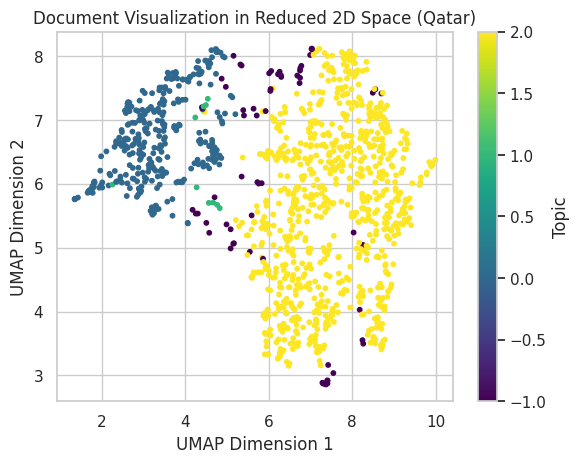

In [221]:
import matplotlib.pyplot as plt

# Assuming 'topics_qatar' is the array of topics assigned to each document in Qatar
# You might need to adjust the size or other parameters based on your specific data
plt.scatter(reduced_embeddings_qatar[:, 0], reduced_embeddings_qatar[:, 1], c=topics_qatar, cmap='viridis', s=10)
plt.title('Document Visualization in Reduced 2D Space (Qatar)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Topic')
plt.show()


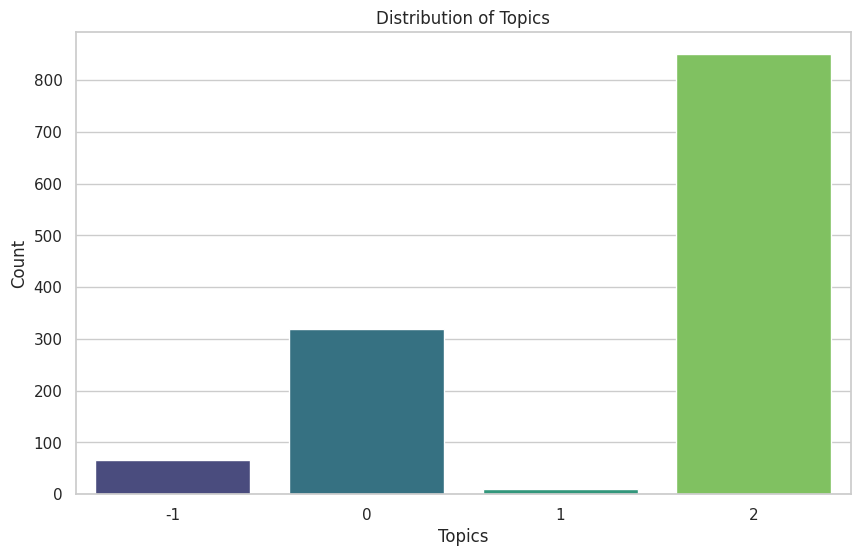

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'topics_qatar' is the array of topics assigned to each document
# You might need to adjust the size or other parameters based on your specific data
plt.figure(figsize=(10, 6))
sns.countplot(x=topics_qatar, palette='viridis')
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.show()


In [228]:
# Assuming 'topic_model_qatar' is your BERTopic model

# Get the top terms for each topic
top_terms_per_topic = topic_model_qatar.get_topics()

# Print the top terms for each topic
for topic_id, terms_with_weights in top_terms_per_topic.items():
    terms = [term for term, _ in terms_with_weights]  # Extract only the terms
    print(f"Top terms for Topic {topic_id}: {', '.join(terms)}\n")


Top terms for Topic -1: the, and, was, to, on, of, in, flight, were, is

Top terms for Topic 0: the, and, was, to, of, on, in, is, service, very

Top terms for Topic 1: the, was, and, were, to, good, for, food, of, but

Top terms for Topic 2: the, and, to, was, in, on, of, flight, with, qatar



In [229]:
# Assuming 'topic_model_qatar' is your BERTopic model

# Define your custom stopword list
custom_stopwords = set(['the', 'and', 'was', 'to', 'on', 'of', 'in', 'flight', 'were', 'is', 'good', 'for', 'but', 'with', 'qatar'])

# Get the top terms for each topic
top_terms_per_topic = topic_model_qatar.get_topics()

# Print the top terms for each topic, excluding custom stopwords
for topic_id, terms_with_weights in top_terms_per_topic.items():
    terms = [term for term, _ in terms_with_weights if term not in custom_stopwords]  # Exclude custom stopwords
    print(f"Top terms for Topic {topic_id}: {', '.join(terms)}\n")


Top terms for Topic -1: 

Top terms for Topic 0: service, very

Top terms for Topic 1: food

Top terms for Topic 2: 



This has a lot of stop Words so removing them is important

In [ ]:
##Lets use stopword before topic modeling

In [230]:
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming df_no_duplicates is your DataFrame with the relevant columns
qatar_positive_reviews = df_no_duplicates[(df_no_duplicates['airline'] == 'qatar') & (df_no_duplicates['pos_neu_neg_review_score'] == 'pos')]

# Combine all positive reviews into a list
all_positive_reviews_text_qatar = qatar_positive_reviews['review_text'].tolist()

# Remove stopwords
stop_words = set(stopwords.words('english'))
all_positive_reviews_text_qatar = [' '.join([word for word in word_tokenize(review) if word.lower() not in stop_words]) for review in all_positive_reviews_text_qatar]

# Use a pre-trained sentence embedding model
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings_qatar = sentence_model.encode(all_positive_reviews_text_qatar, show_progress_bar=True)

# Apply UMAP for dimensionality reduction
umap_model_qatar = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine')
reduced_embeddings_qatar = umap_model_qatar.fit_transform(embeddings_qatar)

# Initialize BERTopic model
topic_model_qatar = BERTopic(vectorizer_model=None, embedding_model=None, umap_model=umap_model_qatar, calculate_probabilities=True, nr_topics=40)

# Fit and transform the model on the preprocessed text
topics_qatar, probs_qatar = topic_model_qatar.fit_transform(all_positive_reviews_text_qatar, embeddings_qatar)

# Get the most frequent topics
most_frequent_topics_qatar = topic_model_qatar.get_topic_freq().head(10)

# Print the most frequent topics
print(most_frequent_topics_qatar)

# Save the topics and their frequencies to a DataFrame
topics_df_qatar = pd.DataFrame({'Topic': most_frequent_topics_qatar['Topic'], 'Frequency': most_frequent_topics_qatar['Count']})

## Explore representative documents for Topic -1
representative_docs_topic_minus_1 = topic_model_qatar.get_topic(-1)
print(f"Representative Documents for Topic -1:")
for doc in representative_docs_topic_minus_1:
    print(doc)
print("\n")

# Print the DataFrame
print(topics_df_qatar)


Batches:   0%|          | 0/39 [00:00<?, ?it/s]

    Topic  Count
0      -1    561
2       4    149
5       5     72
10     14     59
4       9     54
3       8     41
8      11     37
14     13     36
12      7     30
13     10     29
Representative Documents for Topic -1:
('flight', 0.024748151375582336)
('good', 0.021155175486074963)
('qatar', 0.02069747264508066)
('service', 0.018932272912077996)
('doha', 0.018880286077076935)
('food', 0.01871962526398259)
('seat', 0.017660691327894915)
('airways', 0.016652404443067006)
('class', 0.015804080990579564)
('time', 0.015631496418205826)


    Topic  Frequency
0      -1        561
2       4        149
5       5         72
10     14         59
4       9         54
3       8         41
8      11         37
14     13         36
12      7         30
13     10         29


In [264]:
##Reduce Outliers

In [232]:
# Reduce outliers
new_topics_qatar = topic_model_qatar.reduce_outliers(all_positive_reviews_text_qatar, topics_qatar, probabilities=probs_qatar, threshold=0.05, strategy="probabilities")

# Update the topics based on reduced outliers
topic_model_qatar.update_topics(all_positive_reviews_text_qatar, topics=new_topics_qatar)

# Get the most frequent topics after reduction
most_frequent_topics_qatar_after_reduction = topic_model_qatar.get_topic_freq().head(10)

# Print the most frequent topics after reduction
print(most_frequent_topics_qatar_after_reduction)

# Save the topics and their frequencies to a DataFrame
topics_df_qatar_after_reduction = pd.DataFrame({'Topic': most_frequent_topics_qatar_after_reduction['Topic'], 'Frequency': most_frequent_topics_qatar_after_reduction['Count']})

# Print the DataFrame after reduction
print(topics_df_qatar_after_reduction)

2024-01-16 00:35:36,416 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


    Topic  Count
2       4    159
8      15    110
4       5     93
5       9     83
9      13     82
15      7     73
13     14     73
18     16     73
7      17     65
3       8     60
    Topic  Frequency
2       4        159
8      15        110
4       5         93
5       9         83
9      13         82
15      7         73
13     14         73
18     16         73
7      17         65
3       8         60


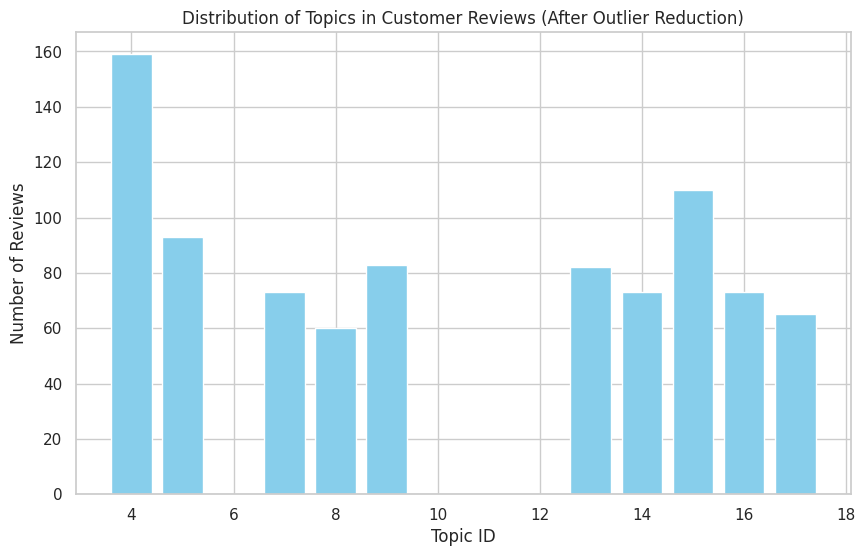

In [263]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in 'topics_df_qatar_after_reduction'
# Replace with your actual variable name if needed
topics_df_qatar_after_reduction = pd.DataFrame({'Topic': most_frequent_topics_qatar_after_reduction['Topic'], 'Frequency': most_frequent_topics_qatar_after_reduction['Count']})

# Sort the DataFrame by topic frequency in descending order
sorted_topics_df_after_reduction = topics_df_qatar_after_reduction.sort_values(by='Frequency', ascending=False)

# Create a bar chart for most frequent topics after reduction
plt.figure(figsize=(10, 6))
plt.bar(sorted_topics_df_after_reduction['Topic'], sorted_topics_df_after_reduction['Frequency'], color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Topics in Customer Reviews (After Outlier Reduction)')
plt.show()


###Topic 4 has the highest count
The count indicates how many reviews are associated with each topic. Higher counts generally suggest that more reviews are focused on the themes captured by that topic. Therefore, Topic 4 (related to service, crew, and overall airline experience) is among the topics that have garnered a considerable number of reviews.



In [237]:
# Get the top terms for each topic
top_terms_per_topic = topic_model_qatar.get_topics()

# Print the top terms for each topic
for topic_id, terms_with_weights in top_terms_per_topic.items():
    terms = [term[0] for term in terms_with_weights]  # Extracting only the terms
    print(f"Top terms for Topic {topic_id}: {', '.join(terms)}\n")


Top terms for Topic -1: good, cabin, food, time, flight, qr, class, crew, served, arrived

Top terms for Topic 0: hamad, airport, international, comfortable, easy, flight, bit, entertainment, inflight, good

Top terms for Topic 1: good, food, service, a380, seats, staff, much, seat, aircraft, flight

Top terms for Topic 2: seat, boarding, flight, crew, time, mother, leg, hour, took, aircraft

Top terms for Topic 3: cabin, class, business, food, seats, well, wifi, flight, board, economy

Top terms for Topic 4: service, crew, airline, cabin, food, flight, good, great, staff, helpful

Top terms for Topic 5: airways, qatar, thank, crew, experience, service, flight, us, would, like

Top terms for Topic 6: qatar, airways, flight, airline, time, et, staff, service, first, change

Top terms for Topic 7: qatar, airways, food, good, service, airline, airlines, comfortable, crew, staff

Top terms for Topic 8: flight, lounge, doha, time, good, qatar, food, full, class, minutes

Top terms for Topic

Topic 4 seems to revolve around the overall service experience provided by Qatar Airways, encompassing various aspects such as the airline's services, the behavior of the crew, the quality of the cabin, and the helpfulness of the staff. Let's delve deeper into what each of these terms may imply:

Service: This term suggests that reviews in this topic are likely to discuss the general service quality provided by Qatar Airways. This could include the efficiency of ground services, the responsiveness of customer support, and the overall customer service experience throughout the journey.

Crew: The inclusion of "crew" in this topic indicates a focus on the behavior, professionalism, and helpfulness of the flight attendants and staff. Positive sentiments in this regard could highlight friendly and attentive crew members who enhance the overall travel experience.

Airline: Since "airline" is mentioned, the topic may encompass broader aspects of Qatar Airways as an airline, beyond the specific flight experience. This might include aspects such as booking procedures, online services, loyalty programs, and overall satisfaction with Qatar Airways as a brand.

Cabin: The term "cabin" suggests that the condition and features of the aircraft cabin are relevant to this topic. Reviews may touch on aspects like cleanliness, comfort, and amenities within the cabin, providing insights into passengers' experiences during the flight.

Helpful: The inclusion of "helpful" indicates that customers in this topic are likely to highlight instances where they found the airline staff and services to be accommodating and supportive. This could include assistance with special requests, problem resolution, or general helpfulness exhibited by Qatar Airways personnel.


In summary, Topic 4 appears to aggregate reviews that focus on the holistic service experience with Qatar Airways. It covers a spectrum of elements, including the quality of services provided by the airline, positive interactions with the crew, feedback on the overall airline experience, considerations regarding the aircraft cabin, and appreciation for the helpfulness of the staff. Analyzing reviews within this topic can provide valuable insights into the factors that contribute to a positive customer experience with Qatar Airways.








In [243]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#This Analysis Validates that etihad is loosing because of the Services based on behaviour of crew, staff. The opposite can be seen for Qatar with great services. Thereofre Etihade needs to focus more on its Human resources.